<a href="https://colab.research.google.com/github/Pr-E/Hybrid_Approach_For_Sepsis_Risk_Stratification_System/blob/main/SEPSIS_RISK_STRATIFICATION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MOUNT GOOGLE DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
DIR="/content/drive/MyDrive/MSc Project"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORT DATASET**

In [3]:
import pandas as pd

# Import dataset
file_path = '/content/drive/MyDrive/MSc Project/Sepsis_def.csv'
df = pd.read_csv(file_path)
df.head()

,cod,Fecha_ing,Sexo,Edad,Hospital,Proced,Reg_salud,Peso,Talla,IMC,...,SOFA,ATB_1,ATB_2,ATB_3,Cultivos,IOT,Dias_iot,IRA,Dialisis,Muerte
0,57,09/11/2021,0,48,0,2,1,78.0,1.66,28.3,...,16,4,17,17,1,1,4,1,0,0
1,88,18/03/2022,1,66,1,4,1,70.0,1.57,28.4,...,9,0,17,17,0,0,0,0,0,0
2,37,11/08/2021,0,74,0,2,1,59.0,1.62,22.5,...,14,17,17,17,8,0,0,0,0,0
3,198,28/08/2022,0,83,1,4,1,73.0,1.62,27.8,...,8,7,13,17,9,0,0,1,0,0
4,152,13/05/2022,1,78,1,3,0,65.1,1.64,24.2,...,9,0,17,17,0,0,0,0,0,0


**TRANSLATE DATASET FROM SPANISH TO ENGLISH**

In [4]:
import pandas as pd

# Define the translation dictionary
translation_dict = {
    "cod": "Code",
    "Fecha_ing": "Admission_Date",
    "Sexo": "Sex",
    "Edad": "Age",
    "Hospital": "Hospital",
    "Proced": "Origin_City",
    "Reg_salud": "Health_Regime",
    "Peso": "Weight",
    "Talla": "Height",
    "IMC": "BMI",
    "HTA": "Hypertension",
    "ARA_2": "ARA_2_Usage",
    "IECA": "ACE_Inhibitor_Usage",
    "Tiazidas": "Thiazide_Usage",
    "diur_asa": "Loop_Diuretic_Usage",
    "Calcio antagonista": "Calcium_Channel_Blocker_Usage",
    "Beta_bloqueador": "Beta_Blocker_Usage",
    "Otros_antihta": "Other_Antihypertensives_Usage",
    "DM_2": "Diabetes_Mellitus_2",
    "Metformina": "Metformin_Usage",
    "iSGLT2": "SGLT2_Inhibitor_Usage",
    "DDPIV": "DPP4_Inhibitor_Usage",
    "GLP1a": "GLP1_Agonist_Usage",
    "Insulina_basal": "Basal_Insulin_Usage",
    "Dosis_basal": "Basal_Insulin_Dose",
    "Insulina_preprandial": "Preprandial_Insulin_Usage",
    "Dosis_preprandial": "Preprandial_Insulin_Dose",
    "Otros_antidiabeticos": "Other_Antidiabetics_Usage",
    "Hipotiroidismo": "Hypothyroidism",
    "ERC": "Chronic_Kidney_Disease",
    "Tabaco": "Smoking",
    "Enf_coronaria": "Coronary_Artery_Disease",
    "Obesidad": "Obesity",
    "Dislipidemia": "Dyslipidemia",
    "ACV": "Stroke",
    "Fib_aur": "Atrial_Fibrillation",
    "Autoinmune": "Autoimmune_Disease",
    "Sepsis": "Infection",
    "Alt_C": "Altered_Consciousness",
    "Tas_inicial": "Initial_Systolic_BP",
    "Tad_inicial": "Initial_Diastolic_BP",
    "Tam_inicial": "Initial_Mean_Arterial_BP",
    "Fc_inicial": "Initial_Heart_Rate",
    "s_index0": "Initial_Shock_Index",
    "fctad_inicial": "Initial_HR_Diastolic_Ratio",
    "Fr_inicial": "Initial_Respiratory_Rate",
    "Tas_12h": "12h_Systolic_BP",
    "Tad_12h": "12h_Diastolic_BP",
    "Tam_12h": "12h_Mean_Arterial_BP",
    "Fc_12h": "12h_Heart_Rate",
    "s_index12": "12h_Shock_Index",
    "fctad_12h": "12h_HR_Diastolic_Ratio",
    "Tas_24h": "24h_Systolic_BP",
    "Tad_24h": "24h_Diastolic_BP",
    "Tam_24h": "24h_Mean_Arterial_BP",
    "Fc_24h": "24h_Heart_Rate",
    "s_index24": "24h_Shock_Index",
    "fctad_24h": "24h_HR_Diastolic_Ratio",
    "Sato2_inicial": "Initial_Oxygen_Saturation",
    "Lactato_inicial": "Initial_Lactate",
    "Lactato_24h": "24h_Lactate",
    "capilar": "Initial_Capillary_Refill_Time",
    "capilar24": "24h_Capillary_Refill_Time",
    "ph": "Initial_pH",
    "pH24": "24h_pH",
    "Hco3": "Initial_Bicarbonate",
    "Hco3_24": "24h_Bicarbonate",
    "Wbc_inicial": "Initial_WBC",
    "N_inicial": "Initial_Neutrophils",
    "L_inicial": "Initial_Lymphocytes",
    "NL": "Initial_N/L_Ratio",
    "Wbc_24h": "24h_WBC",
    "N_24h": "24h_Neutrophils",
    "L_24h": "24h_Lymphocytes",
    "NL_24h": "24h_N/L_Ratio",
    "PCR_inicial": "Initial_CRP",
    "PCR_24h": "24h_CRP",
    "Procal": "Initial_PCT",
    "Glucosilada": "Initial_HbA1c",
    "Gluco_1": "Glucose_Test_1",
    "Gluco_2": "Glucose_Test_2",
    "Gluco_3": "Glucose_Test_3",
    "CV_gluc": "Glucose_Variability_Coefficient",
    "Norepi": "Norepinephrine_Usage",
    "Norepi_0": "Initial_Norepinephrine_Dose",
    "Norepi_24": "24h_Norepinephrine_Dose",
    "Vasopresina": "Vasopressin_Usage",
    "SOFA": "SOFA_Score",
    "ATB_1": "Antibiotic_1",
    "ATB_2": "Antibiotic_2",
    "ATB_3": "Antibiotic_3",
    "Cultivos": "Microbiological_Cultures",
    "IOT": "Intubation_Requirement",
    "Dias_iot": "Intubation_Days",
    "IRA": "Acute_Kidney_Injury",
    "Dialisis": "Dialysis_Requirement",
    "Muerte": "Death",
    "Salida_hospital": "Discharged_Alive"
}

# Translate column names
df.rename(columns=translation_dict, inplace=True)

# Verify the new column names
print("DataFrame with Translated Columns:")
print(df.columns.tolist())

DataFrame with Translated Columns:
['Code', 'Admission_Date', 'Sex', 'Age', 'Hospital', 'Origin_City', 'Health_Regime', 'Weight', 'Height', 'BMI', 'Hypertension', 'ARA_2_Usage', 'ACE_Inhibitor_Usage', 'Thiazide_Usage', 'Loop_Diuretic_Usage', 'Calcium_Channel_Blocker_Usage', 'Beta_Blocker_Usage', 'Other_Antihypertensives_Usage', 'Diabetes_Mellitus_2', 'Metformin_Usage', 'SGLT2_Inhibitor_Usage', 'DPP4_Inhibitor_Usage', 'GLP1_Agonist_Usage', 'Basal_Insulin_Usage', 'Basal_Insulin_Dose', 'Preprandial_Insulin_Usage', 'Preprandial_Insulin_Dose', 'Other_Antidiabetics_Usage', 'Hypothyroidism', 'Chronic_Kidney_Disease', 'Smoking', 'Coronary_Artery_Disease', 'Obesity', 'Dyslipidemia', 'Stroke', 'Atrial_Fibrillation', 'Autoimmune_Disease', 'Infection', 'Altered_Consciousness', 'Initial_Systolic_BP', 'Initial_Diastolic_BP', 'Initial_Mean_Arterial_BP', 'Initial_Heart_Rate', 'Initial_Shock_Index', 'Initial_HR_Diastolic_Ratio', 'Initial_Respiratory_Rate', '12h_Systolic_BP', '12h_Diastolic_BP', '12h_Me

**SELECT VARIABLES RELEVANT FOR DOWNSTREAM ANALYSIS**

In [5]:
import pandas as pd

# List of columns to drop
columns_to_drop = [
    "Hospital", "Origin_City", "Health_Regime", "Weight", "Height", "BMI",
    "Hypertension", "ARA_2_Usage", "ACE_Inhibitor_Usage", "Calcium_Channel_Blocker_Usage", "Beta_Blocker_Usage",
    "Thiazide_Usage", "Loop_Diuretic_Usage", "Other_Antihypertensives_Usage", "Metformin_Usage",
    "SGLT2_Inhibitor_Usage", "DPP4_Inhibitor_Usage", "GLP1_Agonist_Usage", "Basal_Insulin_Usage",
    "Basal_Insulin_Dose", "Preprandial_Insulin_Usage", "Preprandial_Insulin_Dose", "Other_Antidiabetics_Usage",
    "Hypothyroidism", "Smoking", "Obesity", "Dyslipidemia", "Stroke", "Atrial_Fibrillation",
    "Altered_Consciousness", "Initial_Oxygen_Saturation", "Initial_Shock_Index", "12h_Shock_Index", "Initial_Diastolic_BP", "12h_HR_Diastolic_Ratio", "24h_HR_Diastolic_Ratio",
    "12h_Diastolic_BP", "24h_Diastolic_BP", "Initial_HR_Diastolic_Ratio", "Initial_Mean_Arterial_BP", "12h_Mean_Arterial_BP",
    "24h_Mean_Arterial_BP", "Initial_pH", "24h_pH", "Initial_Bicarbonate", "24h_Bicarbonate",
    "Norepinephrine_Usage", "Initial_Norepinephrine_Dose", "24h_Norepinephrine_Dose", "Vasopressin_Usage",
    "Intubation_Requirement", "Acute_Kidney_Injury", "Dialysis_Requirement", "24h_Shock_Index",
    "Initial_Capillary_Refill_Time", "24h_Capillary_Refill_Time", "Initial_Neutrophils",
    "Initial_Lymphocytes", "Initial_N/L_Ratio", "24h_Neutrophils", "24h_Lymphocytes", "24h_N/L_Ratio",
    "Initial_HbA1c", "Glucose_Test_1", "Glucose_Test_2", "Glucose_Test_3", "Glucose_Variability_Coefficient",
    "Antibiotic_1", "Antibiotic_2", "Antibiotic_3", "Microbiological_Cultures", "Intubation_Days"
]

# Drop columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Verify the DataFrame after dropping columns
print("DataFrame after dropping specified columns:")
(df.head())

DataFrame after dropping specified columns:


,Code,Admission_Date,Sex,Age,Diabetes_Mellitus_2,Chronic_Kidney_Disease,Coronary_Artery_Disease,Autoimmune_Disease,Infection,Initial_Systolic_BP,...,24h_Heart_Rate,Initial_Lactate,24h_Lactate,Initial_WBC,24h_WBC,Initial_CRP,24h_CRP,Initial_PCT,SOFA_Score,Death
0,57,09/11/2021,0,48,0,0,0,0,5,120,...,103,8.20,3.500,34500,39000,17.80,12.5,11.0,16,0
1,88,18/03/2022,1,66,0,0,0,0,10,128,...,83,3.00,2.640,18700,17000,8.40,4.8,2.6,9,0
2,37,11/08/2021,0,74,0,0,0,0,7,98,...,106,0.60,0.528,4800,3840,2.20,2.0,0.8,14,0
3,198,28/08/2022,0,83,0,1,0,0,7,118,...,92,0.48,1.370,5210,10660,9.47,21.0,2.2,8,0
4,152,13/05/2022,1,78,0,0,0,0,10,120,...,83,1.20,1.010,18700,17000,8.40,4.8,2.6,9,0


In [6]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Code                      200 non-null    int64  
 1   Admission_Date            200 non-null    object 
 2   Sex                       200 non-null    int64  
 3   Age                       200 non-null    int64  
 4   Diabetes_Mellitus_2       200 non-null    int64  
 5   Chronic_Kidney_Disease    200 non-null    int64  
 6   Coronary_Artery_Disease   200 non-null    int64  
 7   Autoimmune_Disease        200 non-null    int64  
 8   Infection                 200 non-null    int64  
 9   Initial_Systolic_BP       200 non-null    int64  
 10  Initial_Heart_Rate        200 non-null    int64  
 11  Initial_Respiratory_Rate  200 non-null    int64  
 12  12h_Systolic_BP           200 non-null    int64  
 13  12h_Heart_Rate            200 non-null    int64  
 14  24h_Systol

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


### **DATASET BASIC INFORMATION**

In [ ]:
import pandas as pd
# Convert 'Admission_Date' to datetime format with day first
df['Admission_Date'] = pd.to_datetime(df['Admission_Date'], dayfirst=True)

# Calculate the earliest and latest admission dates
earliest_date = df['Admission_Date'].min()
latest_date = df['Admission_Date'].max()

# Print the results
print(f"Earliest Admission Date: {earliest_date}")
print(f"Latest Admission Date: {latest_date}")

Earliest Admission Date: 2021-02-02 00:00:00
Latest Admission Date: 2022-09-04 00:00:00


**AGE DISTRIBUTION**

In [ ]:
import pandas as pd

# Calculate the mean age
mean_age = df['Age'].mean()

# Calculate the median age
median_age = df['Age'].median()

# Calculate the mode age (there can be multiple modes)
mode_age = df['Age'].mode()

# Print the results
print(f"Mean age: {mean_age:.2f} years")
print(f"Median age: {median_age:.2f} years")
print("Mode age(s):")
for mode in mode_age:
    print(f"{mode} years")

# Find the lowest age
lowest_age = df['Age'].min()

# Find the highest age
highest_age = df['Age'].max()

print(f"Lowest Age: {lowest_age}")
print(f"Highest Age: {highest_age}")

Mean age: 61.73 years
Median age: 63.00 years
Mode age(s):
64 years
Lowest Age: 18
Highest Age: 95


**SEX DISTRIBUTION**

In [ ]:
import pandas as pd

# Get the distribution of the 'Sex' column
sex_distribution = df['Sex'].value_counts()

# Print the distribution
print("Sex Distribution:")
print(sex_distribution)

Sex Distribution:
Sex
1    102
0     98
Name: count, dtype: int64


### **DATA PREPROCESSING STAGE**

---



First stage of data preprocessing involves utilising the feed forward/backward tecnique to construct additional columns for variables with just initial time steps including Respiratory Rate and PCT.

Interpolation technique was similarly used to fill in the variables with 2 time steps; Initial and 24h (i.e variables missing the 12h time step)



In [7]:
import pandas as pd
import numpy as np

# Add columns for 12h and 24h with initial values
df['12h_Respiratory_Rate'] = np.nan
df['24h_Respiratory_Rate'] = np.nan
df['12h_PCT'] = np.nan
df['24h_PCT'] = np.nan

# Perform forward and backward filling
df['12h_Respiratory_Rate'] = df['Initial_Respiratory_Rate'].ffill().bfill()
df['24h_Respiratory_Rate'] = df['Initial_Respiratory_Rate'].ffill().bfill()

df['12h_PCT'] = df['Initial_PCT'].ffill().bfill()
df['24h_PCT'] = df['Initial_PCT'].ffill().bfill()

# Define the range for random noise
noise_range = {
    'Respiratory_Rate': (1, 5),  # Define min and max noise for respiratory rate
    'PCT': (0.1, 0.2)  # Define min and max noise for PCT
}

# Function to add random noise
def add_random_noise(value, noise_range):
    noise = np.random.uniform(-noise_range, noise_range)
    return value + noise

# Add random noise to the forward and backward filled values
df['12h_Respiratory_Rate'] = df['12h_Respiratory_Rate'].apply(
    lambda x: round(add_random_noise(x, noise_range['Respiratory_Rate'][1]), 0)
)
df['24h_Respiratory_Rate'] = df['24h_Respiratory_Rate'].apply(
    lambda x: round(add_random_noise(x, noise_range['Respiratory_Rate'][1]), 0)
)

df['12h_PCT'] = df['12h_PCT'].apply(
    lambda x: round(add_random_noise(x, noise_range['PCT'][1]), 1)
)
df['24h_PCT'] = df['24h_PCT'].apply(
    lambda x: round(add_random_noise(x, noise_range['PCT'][1]), 1)
)

# Print only the relevant columns
print("DataFrame with Forward and Backward Filling and Random Noise Added:")
(df[['Initial_Respiratory_Rate', '12h_Respiratory_Rate', '24h_Respiratory_Rate', 'Initial_PCT', '12h_PCT', '24h_PCT']])

DataFrame with Forward and Backward Filling and Random Noise Added:


,Initial_Respiratory_Rate,12h_Respiratory_Rate,24h_Respiratory_Rate,Initial_PCT,12h_PCT,24h_PCT
0,28,29.0,28.0,11.0,10.9,11.1
1,14,18.0,18.0,2.6,2.7,2.7
2,14,15.0,12.0,0.8,0.7,0.7
3,15,16.0,14.0,2.2,2.1,2.4
4,15,11.0,16.0,2.6,2.5,2.6
...,...,...,...,...,...,...
195,12,10.0,11.0,10.0,10.1,9.8
196,24,22.0,29.0,14.2,14.1,14.1
197,16,21.0,14.0,10.5,10.4,10.3
198,16,20.0,14.0,10.1,10.1,10.0


In [8]:
import pandas as pd
import numpy as np

# Add columns for 12h with initial and 24h values
df['12h_Lactate'] = np.nan
df['12h_WBC'] = np.nan
df['12h_CRP'] = np.nan

# Define interpolation method and fill 12h values for each variable
for variable in ['Lactate', 'WBC', 'CRP']:
    initial_col = f'Initial_{variable}'
    hour24_col = f'24h_{variable}'
    new_col = f'12h_{variable}'

    # Calculate interpolated values for 12h using the linear interpolation
    df[new_col] = df.apply(
        lambda row: np.nan if pd.isnull(row[initial_col]) or pd.isnull(row[hour24_col]) else
        row[initial_col] + 0.5 * (row[hour24_col] - row[initial_col]),
        axis=1
    )

# Print the DataFrame with interpolated 12h values
print("DataFrame with Interpolated 12h Values:")
(df[['Initial_Lactate', '12h_Lactate', '24h_Lactate',
          'Initial_WBC', '12h_WBC', '24h_WBC',
          'Initial_CRP', '12h_CRP', '24h_CRP']])

DataFrame with Interpolated 12h Values:


,Initial_Lactate,12h_Lactate,24h_Lactate,Initial_WBC,12h_WBC,24h_WBC,Initial_CRP,12h_CRP,24h_CRP
0,8.20,5.850,3.500,34500,36750.0,39000,17.80,15.150,12.5
1,3.00,2.820,2.640,18700,17850.0,17000,8.40,6.600,4.8
2,0.60,0.564,0.528,4800,4320.0,3840,2.20,2.100,2.0
3,0.48,0.925,1.370,5210,7935.0,10660,9.47,15.235,21.0
4,1.20,1.105,1.010,18700,17850.0,17000,8.40,6.600,4.8
...,...,...,...,...,...,...,...,...,...
195,1.20,1.125,1.050,6840,7182.0,7524,12.00,11.350,10.7
196,1.60,1.500,1.400,19500,20475.0,21450,62.00,58.600,55.2
197,2.10,1.950,1.800,9900,10395.0,10890,14.00,13.500,13.0
198,7.20,7.000,6.800,18600,19011.0,19422,16.00,15.550,15.1


## **FEATURE ENGINEERING**

PIRO framework Overview

The feature engineering stage for incorporating the PIRO framework involved meticulously selecting and processing clinical data to align with each component of the framework: Predisposition, Infection, Response, and Organ Dysfunction. Key demographic factors and comorbidities were identified to capture predisposition. For the Infection component, infection types were represented with higher points assigned to more severe infections, providing a nuanced view of the patient's infectious state. The Response component was captured using key physiological markers such as heart rate, respiratory rate, white blood cell (WBC) count, C-reactive protein (CRP), and procalcitonin (PCT). These variables were evaluated across three time stamps—initial time, 12 hours, and 24 hours—using a predefined logic: a 'low' status was assigned if all time stamps were below a certain cut-off, a 'medium' status if up to two time stamps were above the cut-off, and a 'high' status if all time stamps exceeded the cut-off. This same logic was applied to the Organ Dysfunction component variables like lactate and systolic blood pressure to accurately capture the patient's physiological response over time. For the SOFA score, which also falls under the Organ Dysfunction component, points were assigned based on predefined ranges, with higher scores indicating more severe organ dysfunction. This structured feature engineering approach ensured that the PIRO framework was comprehensively integrated into the dataset, enabling precise sepsis risk stratification tailored to each patient's unique clinical presentation.

### **P: PREDISPOSITION**

This includes Age and Underlying conditions (comorbidities)

In [9]:
import pandas as pd

# Function to calculate age points
def age_points(age):
    if age <= 45:
        return 1
    elif 45 < age <= 65:
        return 2
    else:
        return 3

# Calculate Predisposition Score
df['Age_Points'] = df['Age'].apply(age_points)
df['Comorbidity_Points'] = df[['Diabetes_Mellitus_2', 'Chronic_Kidney_Disease', 'Coronary_Artery_Disease', 'Autoimmune_Disease']].sum(axis=1)
df['Predisposition_Points'] = df['Age_Points'] + df['Comorbidity_Points']

# Select the relevant columns
result_df = df[['Age', 'Diabetes_Mellitus_2', 'Chronic_Kidney_Disease', 'Coronary_Artery_Disease', 'Autoimmune_Disease', 'Age_Points', 'Comorbidity_Points', 'Predisposition_Points']]

# Display the DataFrame with selected columns
(result_df)

,Age,Diabetes_Mellitus_2,Chronic_Kidney_Disease,Coronary_Artery_Disease,Autoimmune_Disease,Age_Points,Comorbidity_Points,Predisposition_Points
0,48,0,0,0,0,2,0,2
1,66,0,0,0,0,3,0,3
2,74,0,0,0,0,3,0,3
3,83,0,1,0,0,3,1,4
4,78,0,0,0,0,3,0,3
...,...,...,...,...,...,...,...,...
195,58,1,1,0,0,2,2,4
196,37,1,1,0,0,1,2,3
197,71,1,0,0,0,3,1,4
198,60,1,1,1,0,2,3,5


### **I: INFECTION**

To know the type and understand the severity of Infections

                         Count
Urinary                     53
CAP                         53
Colangitis                  33
Diabetic Foot               15
Diverticulitis              10
Post-surgical Infection      8
Osteomyelitis                8
Peritonitis                  7
Infected COPD                6
Empyema                      5
Endocarditis                 2


<Figure size 1200x600 with 0 Axes>

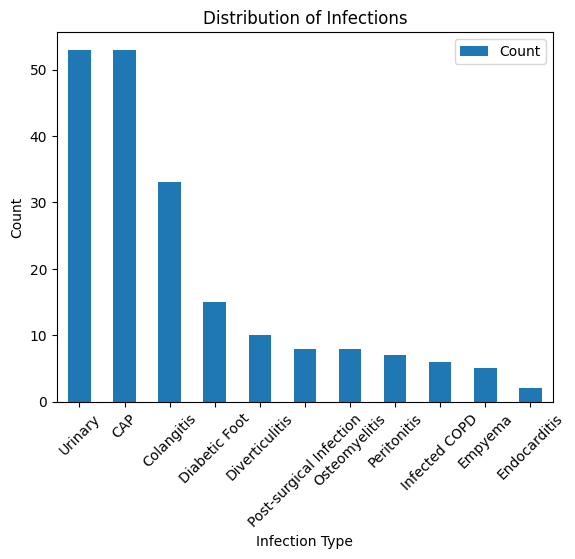

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assuming df is your DataFrame
infection_mapping = {
    0: 'Colangitis',
    1: 'Diverticulitis',
    2: 'Endocarditis',
    3: 'Osteomyelitis',
    4: 'Peritonitis',
    5: 'Empyema',
    6: 'Infected COPD',
    7: 'CAP',
    8: 'Diabetic Foot',
    9: 'Post-surgical Infection',
    10: 'Urinary'
}

# Replace numeric values with English names
df['Infection'] = df['Infection'].replace(infection_mapping)

# Check if there are multiple infections in one entry
all_infections = df['Infection'].dropna().str.split(',').tolist()
flattened_infections = [item.strip() for sublist in all_infections for item in sublist]

# Count the infections
infection_counter = Counter(flattened_infections)

# Convert to a DataFrame for easier plotting
infection_counts = pd.DataFrame.from_dict(infection_counter, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Print the counts
print(infection_counts)

# Plot the distribution
plt.figure(figsize=(12, 6))
infection_counts.plot(kind='bar')
plt.title('Distribution of Infections')
plt.xlabel('Infection Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [11]:
import pandas as pd
# Function to allocate PIRO points based on infection type
def infection_points(infection):
    # Define a dictionary for infection types and their corresponding PIRO points
    infection_points_dict = {
        'CAP': 2,  # Community-Acquired Pneumonia
        'Colangitis': 1,
        'Diverticulitis': 1,
        'Endocarditis': 1,
        'Osteomyelitis': 1,
        'Peritonitis': 1,
        'Empyema': 1,
        'Infected COPD': 1,
        'Diabetic Foot': 1,
        'Post-surgical Infection': 1,
        'Urinary': 1
    }
    # Return the corresponding points or a default value of 0 if the infection type is not in the dictionary
    return infection_points_dict.get(infection, 0)

# Apply the function to calculate infection points
df['Infection_Points'] = df['Infection'].apply(infection_points)

# Select and print the Infection and Infection_Score columns
result_df = df[['Infection', 'Infection_Points']]
(result_df)

,Infection,Infection_Points
0,Empyema,1
1,Urinary,1
2,CAP,2
3,CAP,2
4,Urinary,1
...,...,...
195,Endocarditis,1
196,Peritonitis,1
197,Diabetic Foot,1
198,Diabetic Foot,1


### **R: RESPONSE**

Defines the patients' Inflammatory respsonse to include all general indicators of vital signs including Heart rate, Respiratory rate, White Blood Counts (WBC) and  lab tests including C-Reactive Protein (CRP), and Procalcitonin (PCT).

This stage involves defining threshold based on
established criteria and cut-offs indicative of sepsis.

**HEART RATE STATUS (TACHYCARDIA)**

In [12]:
import pandas as pd

# Defined the tachycardia threshold
tachycardia_threshold = 90

# Function to classify tachycardia status based on heart rate values
def classify_tachycardia(row):
    # Count how many time points have heart rates above the threshold
    count_tachycardia = sum([
        row['Initial_Heart_Rate'] > tachycardia_threshold,
        row['12h_Heart_Rate'] > tachycardia_threshold,
        row['24h_Heart_Rate'] > tachycardia_threshold
    ])

    # Determine overall tachycardia status
    if count_tachycardia == 0:
        return 0  # Low (≤ 90 for all three timeframes)
    elif count_tachycardia <= 2:
        return 1  # Medium (> 90 for at most 2 of all 3)
    else:
        return 2  # High (> 90 for all three timeframes)

# Apply the function to each row in the dataframe to get overall tachycardia status
df['Tachycardia_Status'] = df.apply(classify_tachycardia, axis=1)

# Display the relevant columns
relevant_columns = ['Initial_Heart_Rate', '12h_Heart_Rate', '24h_Heart_Rate', 'Tachycardia_Status']
(df[relevant_columns])

,Initial_Heart_Rate,12h_Heart_Rate,24h_Heart_Rate,Tachycardia_Status
0,117,115,103,2
1,94,92,83,1
2,120,118,106,2
3,104,102,92,2
4,94,92,83,1
...,...,...,...,...
195,127,124,112,2
196,118,127,123,2
197,118,116,104,2
198,125,123,110,2


In [ ]:
# Calculate the average heart rate across all timeframes for each group directly
average_by_status = df.groupby('Tachycardia_Status').apply(
    lambda x: x[['Initial_Heart_Rate', '12h_Heart_Rate', '24h_Heart_Rate']].mean().mean()
)

print("Mean Heart Rate Values Across Each Time Frame:")
print(average_by_status)

Mean Heart Rate Values Across Each Time Frame:
Tachycardia_Status
0     78.829932
1     93.464052
2    122.980000
dtype: float64


**RESPIRATORY RATE STATUS (TACHYPNOEA)**

In [13]:
import pandas as pd

# Defined the tachypnoea threshold
tachypnoea_threshold = 20

# Function to classify tachypnoea status based on respiratory rate values
def classify_tachypnoea(row):
    # Count how many time points have respiratory rates above the threshold
    count_tachypnoea = sum([
        row['Initial_Respiratory_Rate'] > tachypnoea_threshold,
        row['12h_Respiratory_Rate'] > tachypnoea_threshold,
        row['24h_Respiratory_Rate'] > tachypnoea_threshold
    ])

    # Determine overall tachypnoea status
    if count_tachypnoea == 0:
        return 0  # Low (< 20 for all three timeframes)
    elif count_tachypnoea <= 2:
        return 1  # Medium (≥ 20 for at most 2 of all 3)
    else:
        return 2  # High (≥ 20 for all three timeframes)

# Apply the function to each row in the dataframe to get overall tachypnoea status
df['Tachypnoea_Status'] = df.apply(classify_tachypnoea, axis=1)

# Display the relevant columns
relevant_columns = ['Initial_Respiratory_Rate', '12h_Respiratory_Rate', '24h_Respiratory_Rate', 'Tachypnoea_Status']
(df[relevant_columns])

,Initial_Respiratory_Rate,12h_Respiratory_Rate,24h_Respiratory_Rate,Tachypnoea_Status
0,28,29.0,28.0,2
1,14,18.0,18.0,0
2,14,15.0,12.0,0
3,15,16.0,14.0,0
4,15,11.0,16.0,0
...,...,...,...,...
195,12,10.0,11.0,0
196,24,22.0,29.0,2
197,16,21.0,14.0,1
198,16,20.0,14.0,0


In [ ]:
# Calculate mean respiratory rate across all timeframes for each row and use it in the groupby operation
average_by_status = df.groupby('Tachypnoea_Status').apply(
    lambda x: x[['Initial_Respiratory_Rate', '12h_Respiratory_Rate', '24h_Respiratory_Rate']].mean().mean()
)

# Display the average mean respiratory rate by Tachypnoea_Status
print("Mean Respiratory Rate Values Across Each Time Frame:")
print(average_by_status)

Mean Respiratory Rate Values Across Each Time Frame:
Tachypnoea_Status
0    14.812925
1    20.052083
2    27.309524
dtype: float64


**WHITE BLOOD CELL (WBC) ABNORMALITIES**



In [14]:
import pandas as pd

# Defined function to detect WBC abnormalities
def detect_wbc_abnormalities(row):
    abnormalities = []

    # Check for leukocytosis and leukopenia in initial WBC
    if row['Initial_WBC'] > 12000 or row['Initial_WBC'] < 4000:
        abnormalities.append(1)

    # Check for leukocytosis and leukopenia in 12h WBC
    if row['12h_WBC'] > 12000 or row['12h_WBC'] < 4000:
        abnormalities.append(1)

    # Check for leukocytosis and leukopenia in 24h WBC
    if row['24h_WBC'] > 12000 or row['24h_WBC'] < 4000:
        abnormalities.append(1)

    return abnormalities

# Apply the function to each row
df['WBC_Abnormalities'] = df.apply(detect_wbc_abnormalities, axis=1)

# Create an additional column indicating 0 for no abnormalities, 1 for at most two abnormalities, and 2 for all three abnormalities
def classify_wbc_abnormality_status(abnormalities):
    count_abnormalities = len(abnormalities)
    if count_abnormalities == 0:
        return 0  # Low (all three timeframes are within the safe range)
    elif count_abnormalities <= 2:
        return 1  # Medium (at most two timeframes fall within the abnormal range)
    else:
        return 2  # High (all three timeframes fall within the abnormal range)

df['WBC_Abnormality_Status'] = df['WBC_Abnormalities'].apply(classify_wbc_abnormality_status)

# Displays the DataFrame
relevant_columns = ['Initial_WBC', '12h_WBC', '24h_WBC', 'WBC_Abnormalities', 'WBC_Abnormality_Status']
(df[relevant_columns])

,Initial_WBC,12h_WBC,24h_WBC,WBC_Abnormalities,WBC_Abnormality_Status
0,34500,36750.0,39000,"[1, 1, 1]",2
1,18700,17850.0,17000,"[1, 1, 1]",2
2,4800,4320.0,3840,[1],1
3,5210,7935.0,10660,[],0
4,18700,17850.0,17000,"[1, 1, 1]",2
...,...,...,...,...,...
195,6840,7182.0,7524,[],0
196,19500,20475.0,21450,"[1, 1, 1]",2
197,9900,10395.0,10890,[],0
198,18600,19011.0,19422,"[1, 1, 1]",2


In [ ]:
# Calculate the average WBC directly within the groupby operation
average_by_status = df.groupby('WBC_Abnormality_Status').apply(
    lambda x: x[['Initial_WBC', '12h_WBC', '24h_WBC']].mean().mean()
)

print("Mean WBC Values Across Each Time Frame:")
print(average_by_status)

Mean WBC Values Across Each Time Frame:
WBC_Abnormality_Status
0     7338.072917
1    11966.851852
2    19713.696000
dtype: float64


**BIOINDICATORS**



**CRP SEPSIS RISK INDICATION**

In [15]:
import pandas as pd

# Defined the CRP threshold
crp_threshold = 7.9

# Function to classify CRP status based on three timeframes
def classify_crp_status(row):
    exceed_count = sum([
        row['Initial_CRP'] > crp_threshold,
        row['12h_CRP'] > crp_threshold,
        row['24h_CRP'] > crp_threshold
    ])

    if exceed_count == 0:
        return 0  # Low (≤ 7.9 for all three timeframes)
    elif exceed_count <= 2:
        return 1  # Medium (≤ 7.9 for at most 2 of all 3 timeframes)
    else:
        return 2  # High (> 7.9 for all three timeframes)

# Apply the function to each row to get the CRP status
df['CRP_Status'] = df.apply(classify_crp_status, axis=1)

# Displays the relevant columns
relevant_columns = ['Initial_CRP', '12h_CRP', '24h_CRP', 'CRP_Status']
(df[relevant_columns])

,Initial_CRP,12h_CRP,24h_CRP,CRP_Status
0,17.80,15.150,12.5,2
1,8.40,6.600,4.8,1
2,2.20,2.100,2.0,0
3,9.47,15.235,21.0,2
4,8.40,6.600,4.8,1
...,...,...,...,...
195,12.00,11.350,10.7,2
196,62.00,58.600,55.2,2
197,14.00,13.500,13.0,2
198,16.00,15.550,15.1,2


In [ ]:
# Calculate the average CRP directly within the groupby operation
average_by_status = df.groupby('CRP_Status').apply(
    lambda x: x[['Initial_CRP', '12h_CRP', '24h_CRP']].mean().mean()
)

print("\nMean CRP Values Across Each Time Frame by CRP Status:")
print(average_by_status)


Mean CRP Values Across Each Time Frame by CRP Status:
CRP_Status
0     3.664219
1     8.329464
2    22.132036
dtype: float64


**PCT SEPSIS RISK INDICATION**

In [16]:
import pandas as pd

# Defined the Procalcitonine (PCT) threshold
pct_threshold = 0.6  # ng/mL

# Function to classify PCT status based on three timeframes
def classify_pct_status(row):
    exceed_count = sum([
        row['Initial_PCT'] > pct_threshold,
        row['12h_PCT'] > pct_threshold,
        row['24h_PCT'] > pct_threshold
    ])

    if exceed_count == 0:
        return 0  # Low (< 0.6 for all three timeframes)
    elif exceed_count <= 2:
        return 1  # Medium (> 0.6 for at most 2 of all 3 timeframes)
    else:
        return 2  # High (> 0.6 for all three timeframes)

# Apply the function to each row to get the PCT status
df['PCT_Status'] = df.apply(classify_pct_status, axis=1)

# Displays the relevant columns and the mean PCT by status
relevant_columns = ['Initial_PCT', '12h_PCT', '24h_PCT', 'PCT_Status']
(df[relevant_columns])

,Initial_PCT,12h_PCT,24h_PCT,PCT_Status
0,11.0,10.9,11.1,2
1,2.6,2.7,2.7,2
2,0.8,0.7,0.7,2
3,2.2,2.1,2.4,2
4,2.6,2.5,2.6,2
...,...,...,...,...
195,10.0,10.1,9.8,2
196,14.2,14.1,14.1,2
197,10.5,10.4,10.3,2
198,10.1,10.1,10.0,2


In [ ]:
# Calculate the average PCT directly within the groupby operation
average_by_status = df.groupby('PCT_Status').apply(
    lambda x: x[['Initial_PCT', '12h_PCT', '24h_PCT']].mean().mean()
)

print("\nMean PCT Values Across Each Time Frame by PCT Status:")
print(average_by_status)


Mean PCT Values Across Each Time Frame by PCT Status:
PCT_Status
0    0.341667
1    0.682500
2    5.431281
dtype: float64


**RESPONSE POINTS**

In [17]:
import pandas as pd

# Function to calculate the response points by summing the statuses
def calculate_response_points(row):
    return row['Tachycardia_Status'] + \
           row['Tachypnoea_Status'] + \
           row['WBC_Abnormality_Status'] + \
           row['CRP_Status'] + \
           row['PCT_Status']

# Creates a column for Response_Points
df['Response_Points'] = df.apply(calculate_response_points, axis=1)

# Displays the DataFrame with the new Response_Points column
(df[['Tachycardia_Status', 'Tachypnoea_Status', 'WBC_Abnormality_Status', 'CRP_Status', 'PCT_Status', 'Response_Points']])

,Tachycardia_Status,Tachypnoea_Status,WBC_Abnormality_Status,CRP_Status,PCT_Status,Response_Points
0,2,2,2,2,2,10
1,1,0,2,1,2,6
2,2,0,1,0,2,5
3,2,0,0,2,2,6
4,1,0,2,1,2,6
...,...,...,...,...,...,...
195,2,0,0,2,2,6
196,2,2,2,2,2,10
197,2,1,0,2,2,7
198,2,0,2,2,2,8


### **O: ORGAN DYSFUNCTION INDICATORS**

**SOFA POINTS**

The mean SOFA scores for each category reinforce the decision to assign SOFA points based on the score ranges. A SOFA score of 2 is not associated with significant organ dysfunction, hence a SOFA point of 0 is assigned, reflecting minimal or low risk. In contrast, as the SOFA score increases, the associated mean SOFA scores rise significantly, indicating greater organ dysfunction and risk. This gradual increase in mean scores across the categories supports the differentiation between low, intermediate, and critical-risk groups, providing a clear rationale for the scoring thresholds used to assign SOFA points.

In [19]:
import pandas as pd

# Find the minimum and maximum SOFA scores
min_sofa_score = df['SOFA_Score'].min()
max_sofa_score = df['SOFA_Score'].max()

print("SOFA Score Range: {} to {}".format(min_sofa_score, max_sofa_score))

SOFA Score Range: 2 to 24


In [18]:
import pandas as pd

# Assign points based on SOFA_Score
def assign_sofa_points(score):
    if score == 2:
        return 0
    elif 2 < score <= 12:
        return 1
    else:
        return 2

df['SOFA_Points'] = df['SOFA_Score'].apply(assign_sofa_points)

# Display the DataFrame with the new SOFA points column
(df[['SOFA_Score', 'SOFA_Points']])

,SOFA_Score,SOFA_Points
0,16,2
1,9,1
2,14,2
3,8,1
4,9,1
...,...,...
195,14,2
196,20,2
197,16,2
198,16,2


In [ ]:
# Group by SOFA_Points and compute the average of SOFA_Score for each group
average_by_status = df.groupby('SOFA_Points').apply(
    lambda x: x[['SOFA_Score']].mean().mean()
)

print("\nMean SOFA Scores Across Each SOFA Points Status:")
print(average_by_status)


Mean SOFA Scores Across Each SOFA Points Status:
SOFA_Points
0     2.00000
1     9.60274
2    16.61157
dtype: float64


In [21]:
# Filter the DataFrame for patients with SOFA points of 2
high_risk_patients = df[df['SOFA_Points'] == 2]

# Count the number of patients who died
num_deaths_high_risk = high_risk_patients['Death'].sum()

# Print the result
print(f"Number of patients with SOFA points of 2 who died: {num_deaths_high_risk}")

Number of patients with SOFA points of 2 who died: 66


In [19]:
# Filter the DataFrame for patients with SOFA points of 2
high_risk_patients = df[df['SOFA_Points'] == 2]

# Count the number of patients who did not die
num_non_deaths_high_risk = (high_risk_patients['Death'] == 0).sum()

# Print the result
print(f"Number of patients with SOFA points of 2 who did not die: {num_non_deaths_high_risk}")

Number of patients with SOFA points of 2 who did not die: 55


**LACTATE SEPSIS INDICATION**

In [20]:
import pandas as pd
import numpy as np

# Defined the lactate threshold
lactate_threshold = 2

# Function to classify lactate status based on the threshold
def classify_lactate_status(row):
    # Count the number of timeframes where lactate levels are greater than or equal to the threshold
    count_exceeds_threshold = sum([
        row['Initial_Lactate'] >= lactate_threshold,
        row['12h_Lactate'] >= lactate_threshold,
        row['24h_Lactate'] >= lactate_threshold
    ])

    # Classify based on the count of timeframes exceeding the threshold
    if count_exceeds_threshold == 0:
        return 0  # Low
    elif count_exceeds_threshold == 1 or count_exceeds_threshold == 2:
        return 1  # Medium
    else:
        return 2  # High
# Apply the classification function to each row
df['Lactate_Status'] = df.apply(classify_lactate_status, axis=1)

# Displays the relevant columns
relevant_columns = ['Initial_Lactate', '12h_Lactate', '24h_Lactate', 'Lactate_Status']
print("\nRelevant Columns with Lactate Status:")
(df[relevant_columns])


Relevant Columns with Lactate Status:


,Initial_Lactate,12h_Lactate,24h_Lactate,Lactate_Status
0,8.20,5.850,3.500,2
1,3.00,2.820,2.640,2
2,0.60,0.564,0.528,0
3,0.48,0.925,1.370,0
4,1.20,1.105,1.010,0
...,...,...,...,...
195,1.20,1.125,1.050,0
196,1.60,1.500,1.400,0
197,2.10,1.950,1.800,1
198,7.20,7.000,6.800,2


In [ ]:
import pandas as pd

# Group by Lactate_Status and compute the average of lactate values across Initial, 12h, and 24h for each group
average_by_status = df.groupby('Lactate_Status').apply(
    lambda x: x[['Initial_Lactate', '12h_Lactate', '24h_Lactate']].mean().mean()
)

print("\nMean Lactate Values Across Each Time Frame by Lactate Status:")
print(average_by_status)


Mean Lactate Values Across Each Time Frame by Lactate Status:
Lactate_Status
0    1.123782
1    2.252549
2    5.473226
dtype: float64


**SYSTONIC BLOOD PRESSURE (BP) STATUS**

In [21]:
import pandas as pd

# Defined the systolic threshold
systolic_threshold = 100

# Convert BP columns to numeric
for col in ['Initial_Systolic_BP', '12h_Systolic_BP', '24h_Systolic_BP']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Function to classify Systolic BP status
def classify_systolic_bp_status(bp_values, threshold):
    exceed_count = sum(bp > threshold for bp in bp_values)
    if exceed_count == 0:
        return 0  # Low
    elif exceed_count <= 2:
        return 1  # Medium
    else:
        return 2  # High

# Classify Systolic BP status
df['Systolic_BP_Status'] = df.apply(lambda row: classify_systolic_bp_status(
    [row['Initial_Systolic_BP'], row['12h_Systolic_BP'], row['24h_Systolic_BP']],
    systolic_threshold), axis=1)

# Displays the DataFrame with the new classifications
(df[['Initial_Systolic_BP', '12h_Systolic_BP', '24h_Systolic_BP', 'Systolic_BP_Status']])

,Initial_Systolic_BP,12h_Systolic_BP,24h_Systolic_BP,Systolic_BP_Status
0,120,140,144,2
1,128,156,154,2
2,98,115,118,1
3,118,135,142,2
4,120,146,144,2
...,...,...,...,...
195,92,108,110,1
196,100,118,114,1
197,96,112,115,1
198,92,108,110,1


In [ ]:
# Group by Systolic_BP_Status and compute the average systolic blood pressure across Initial, 12h, and 24h for each group
average_by_status = df.groupby('Systolic_BP_Status').apply(
    lambda x: x[['Initial_Systolic_BP', '12h_Systolic_BP', '24h_Systolic_BP']].mean().mean()
)

print("\nMean Systolic Blood Pressure Values Across Each Time Frame by Systolic_BP_Status:")
print(average_by_status)


Mean Systolic Blood Pressure Values Across Each Time Frame by Systolic_BP_Status:
Systolic_BP_Status
0     93.166667
1    104.233766
2    133.953168
dtype: float64


In [22]:
import pandas as pd
# Function to calculate the organ points by summing the statuses
def calculate_organ_dysfunction_points(row):
    return row['SOFA_Points'] + \
           row['Lactate_Status'] + \
           row['Systolic_BP_Status']

# Create Organ_Points column
df['Organ_Dysfunction_Points'] = df.apply(calculate_organ_dysfunction_points, axis=1)

# Display the DataFrame with the new Organ_Points column
(df[['SOFA_Points', 'Lactate_Status', 'Systolic_BP_Status', 'Organ_Dysfunction_Points']])

,SOFA_Points,Lactate_Status,Systolic_BP_Status,Organ_Dysfunction_Points
0,2,2,2,6
1,1,2,2,5
2,2,0,1,3
3,1,0,2,3
4,1,0,2,3
...,...,...,...,...
195,2,0,1,3
196,2,0,1,3
197,2,1,1,4
198,2,2,1,5


In [23]:
import pandas as pd

# Function to calculate the PIRO score
def calculate_piro_score(row):
    # Sum up all the points from the different components
    piro_score = (
        row['Predisposition_Points'] +
        row['Infection_Points'] +
        row['Response_Points'] +
        row['Organ_Dysfunction_Points']
    )
    return piro_score

# Apply the function to each row in the DataFrame
df['PIRO_Score'] = df.apply(calculate_piro_score, axis=1)

# Display the DataFrame with PIRO Scores
(df[['Age', 'Diabetes_Mellitus_2', 'Chronic_Kidney_Disease', 'Coronary_Artery_Disease', 'Autoimmune_Disease', 'Age_Points', 'Comorbidity_Points', 'Predisposition_Points', 'Infection_Points', 'Tachycardia_Status', 'Tachypnoea_Status', 'WBC_Abnormality_Status', 'CRP_Status', 'PCT_Status', 'Response_Points', 'SOFA_Score', 'SOFA_Points', 'Lactate_Status', 'Systolic_BP_Status', 'Organ_Dysfunction_Points', 'PIRO_Score']])

,Age,Diabetes_Mellitus_2,Chronic_Kidney_Disease,Coronary_Artery_Disease,Autoimmune_Disease,Age_Points,Comorbidity_Points,Predisposition_Points,Infection_Points,Tachycardia_Status,...,WBC_Abnormality_Status,CRP_Status,PCT_Status,Response_Points,SOFA_Score,SOFA_Points,Lactate_Status,Systolic_BP_Status,Organ_Dysfunction_Points,PIRO_Score
0,48,0,0,0,0,2,0,2,1,2,...,2,2,2,10,16,2,2,2,6,19
1,66,0,0,0,0,3,0,3,1,1,...,2,1,2,6,9,1,2,2,5,15
2,74,0,0,0,0,3,0,3,2,2,...,1,0,2,5,14,2,0,1,3,13
3,83,0,1,0,0,3,1,4,2,2,...,0,2,2,6,8,1,0,2,3,15
4,78,0,0,0,0,3,0,3,1,1,...,2,1,2,6,9,1,0,2,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,58,1,1,0,0,2,2,4,1,2,...,0,2,2,6,14,2,0,1,3,14
196,37,1,1,0,0,1,2,3,1,2,...,2,2,2,10,20,2,0,1,3,17
197,71,1,0,0,0,3,1,4,1,2,...,0,2,2,7,16,2,1,1,4,16
198,60,1,1,1,0,2,3,5,1,2,...,2,2,2,8,16,2,2,1,5,19


In [24]:
# Compute the range of the PIRO score
min_piro_score = df['PIRO_Score'].min()
max_piro_score = df['PIRO_Score'].max()

# Print the range
print(f"PIRO Score Range: {min_piro_score} to {max_piro_score}")

PIRO Score Range: 7 to 23


In [25]:
import pandas as pd
# Define a function to categorize the PIRO_Score
def categorize_sepsis_risk(piro_score):
    if 0 <= piro_score <= 7:
        return 0  # Low risk
    elif 8 <= piro_score <= 13:
        return 1  # Medium risk
    elif piro_score >= 14:
        return 2  # High risk
    else:
        return None  # If PIRO_Score is out of expected range

# Apply the function to the DataFrame to create the Risk_Level column
df['Sepsis_Risk_Level'] = df['PIRO_Score'].apply(categorize_sepsis_risk)

# Select only the PIRO_Score and Risk_Level columns for display
df_filtered = df[['PIRO_Score', 'Sepsis_Risk_Level']]

# Print the filtered DataFrame
(df_filtered)

,PIRO_Score,Sepsis_Risk_Level
0,19,2
1,15,2
2,13,1
3,15,2
4,13,1
...,...,...
195,14,2
196,17,2
197,16,2
198,19,2


In [ ]:
# Filter the DataFrame for patients with SOFA points of 2
high_risk_patients = df[df['Sepsis_Risk_Level'] == 0]

# Count the number of patients who died
num_deaths_high_risk = high_risk_patients['Death'].sum()

# Print the result
print(f"Number of patients with Sepsis_Risk_Level of 0 who died: {num_deaths_high_risk}")

# Future work in this analysis would involve checking the factors contributing to these patients death

Number of patients with Sepsis_Risk_Level of 0 who died: 0


In [ ]:
# Filter the DataFrame for patients with SOFA points of 2
high_risk_patients = df[df['Sepsis_Risk_Level'] == 1]

# Count the number of patients who died
num_deaths_high_risk = high_risk_patients['Death'].sum()

# Count the number of patients who did not die
num_not_deaths_high_risk = (high_risk_patients['Death'] == 0).sum()

# Print the result
print(f"Number of patients with Sepsis_Risk_Level of 1 who died: {num_deaths_high_risk}")
print(f"Number of patients with Sepsis Risk Level of 1 who did not die: {num_not_deaths_high_risk}")

# Future work in this analysis would involve checking the factors contributing to these patients death

Number of patients with Sepsis_Risk_Level of 1 who died: 2
Number of patients with Sepsis Risk Level of 1 who did not die: 65


In [ ]:
# Filter the DataFrame for patients with Sepsis Risk Level of 2
high_risk_patients = df[df['Sepsis_Risk_Level'] == 2]

# Count the number of patients who died
num_deaths_high_risk = high_risk_patients['Death'].sum()

# Count the number of patients who did not die
num_not_deaths_high_risk = (high_risk_patients['Death'] == 0).sum()

# Print the results
print(f"Number of patients with Sepsis Risk Level of 2 who died: {num_deaths_high_risk}")
print(f"Number of patients with Sepsis Risk Level of 2 who did not die: {num_not_deaths_high_risk}")

Number of patients with Sepsis Risk Level of 2 who died: 74
Number of patients with Sepsis Risk Level of 2 who did not die: 58


<ipython-input-82-da916f3cfc78>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sepsis_Risk_Level', y='Number_of_Deaths', data=death_counts, palette='viridis')


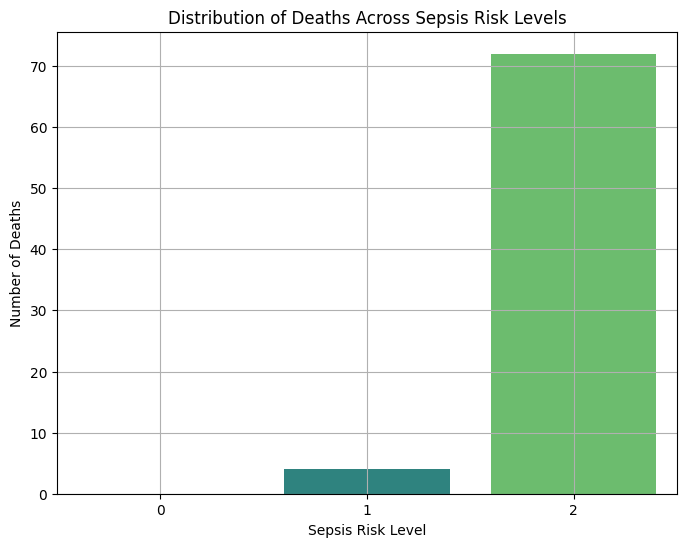

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of deaths in each Sepsis Risk Level
death_counts = df.groupby('Sepsis_Risk_Level')['Death'].sum().reset_index()

# Rename the columns for clarity
death_counts.columns = ['Sepsis_Risk_Level', 'Number_of_Deaths']

# Create a bar plot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='Sepsis_Risk_Level', y='Number_of_Deaths', data=death_counts, palette='viridis')
plt.title('Distribution of Deaths Across Sepsis Risk Levels')
plt.xlabel('Sepsis Risk Level')
plt.ylabel('Number of Deaths')
plt.grid(True)

# Save the plot as a JPEG file
plt.savefig('death_distribution.jpeg', format='jpeg', dpi=300)

# Show the plot
plt.show()

In [28]:
import pandas as pd

class_counts = df['Sepsis_Risk_Level'].value_counts()

# Print the class counts
print(class_counts)

# Find the least populated class
least_populated_class = class_counts.idxmin()
least_count = class_counts.min()

print(f"The least populated class is {least_populated_class} with {least_count} samples.")

Sepsis_Risk_Level
2    132
1     67
0      1
Name: count, dtype: int64
The least populated class is 0 with 1 samples.


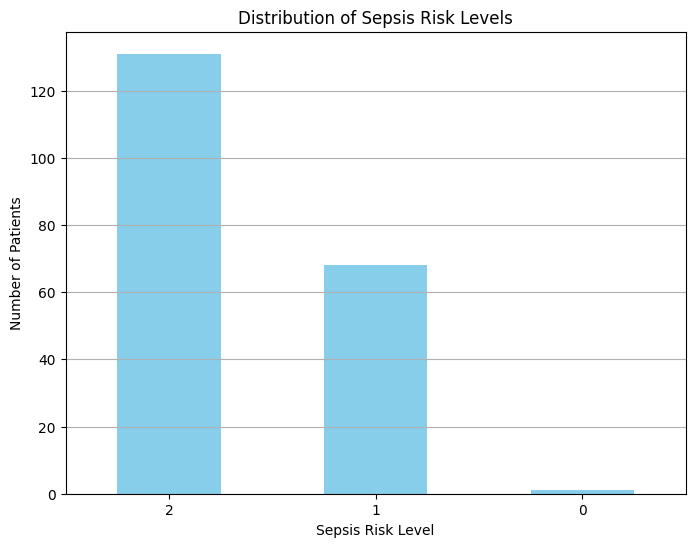

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
class_counts = df['Sepsis_Risk_Level'].value_counts()

# Plotting the class distribution as a bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sepsis Risk Levels')
plt.xlabel('Sepsis Risk Level')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y')  # Add grid lines for the y-axis

#  Save the plot as an image file (e.g., PNG)
plt.savefig('sepsis_risk_level_distribution.png', format='png', dpi=300)

# Display the plot
plt.show()

DROP THE CLASS WITH THE LEAST PATIENT

In [26]:
import pandas as pd

# Drop rows where Sepsis_Risk_Level is 0
df_filtered = df[df['Sepsis_Risk_Level'] != 0] # Dropped the row with class 0 as it is only one patients

# Check the class distribution after dropping
class_counts_filtered = df_filtered['Sepsis_Risk_Level'].value_counts()
print(class_counts_filtered)

Sepsis_Risk_Level
2    132
1     67
Name: count, dtype: int64


In [30]:
# Get the number of samples in the filtered dataset
num_samples = df_filtered.shape[0]
print(f"Number of samples after filtering: {num_samples}")

Number of samples after filtering: 199


In [27]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Filter the DataFrame for patients with Sepsis Risk Level of 2
high_risk_patients = df[df['Sepsis_Risk_Level'] == 2]

# Select relevant features for correlation analysis
features = [
    'Age', 'Sex', 'Diabetes_Mellitus_2', 'Chronic_Kidney_Disease',
    'Coronary_Artery_Disease', 'Autoimmune_Disease', 'Infection',
    'SOFA_Score', 'Initial_Systolic_BP', 'Initial_Heart_Rate',
    'Initial_Respiratory_Rate', 'Initial_Lactate', 'Initial_WBC',
    'Initial_CRP', 'Initial_PCT', '12h_Systolic_BP', '12h_Heart_Rate',
    '12h_Respiratory_Rate', '12h_Lactate', '12h_WBC', '12h_CRP',
    '12h_PCT', '24h_Systolic_BP', '24h_Heart_Rate', '24h_Respiratory_Rate',
    '24h_Lactate', '24h_WBC', '24h_CRP', '24h_PCT'
]

# Add the outcome variable
features.append('Death')

# Create a DataFrame with the selected features
selected_data = high_risk_patients[features]

# Separate the features into numeric and categorical
numeric_features = selected_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = selected_data.select_dtypes(include=['object']).columns.tolist()

# Apply OneHotEncoder to categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical_data = encoder.fit_transform(selected_data[categorical_features])

# Convert encoded categorical data to DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))

# Combine numeric features and encoded categorical features
processed_data = pd.concat([selected_data[numeric_features], encoded_categorical_df], axis=1)

# Calculate the correlation matrix
correlation_matrix = processed_data.corr()

# Extract the correlations with the outcome variable 'Death'
death_correlations = correlation_matrix['Death'].sort_values(ascending=False)

# Print the correlations
print(death_correlations)

Death                                1.000000
24h_Heart_Rate                       0.838241
12h_Heart_Rate                       0.837482
Initial_Heart_Rate                   0.816031
Diabetes_Mellitus_2                  0.629927
Coronary_Artery_Disease              0.582272
24h_Lactate                          0.376047
24h_CRP                              0.313038
Infection_Endocarditis               0.312479
Infection_Peritonitis                0.270203
12h_CRP                              0.252101
SOFA_Score                           0.244356
Chronic_Kidney_Disease               0.209184
Initial_CRP                          0.196283
24h_Respiratory_Rate                 0.193822
12h_Lactate                          0.183910
Initial_Respiratory_Rate             0.178640
12h_Respiratory_Rate                 0.152274
24h_WBC                              0.144360
Age                                  0.118891
Infection_Diabetic Foot              0.101533
24h_PCT                           

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


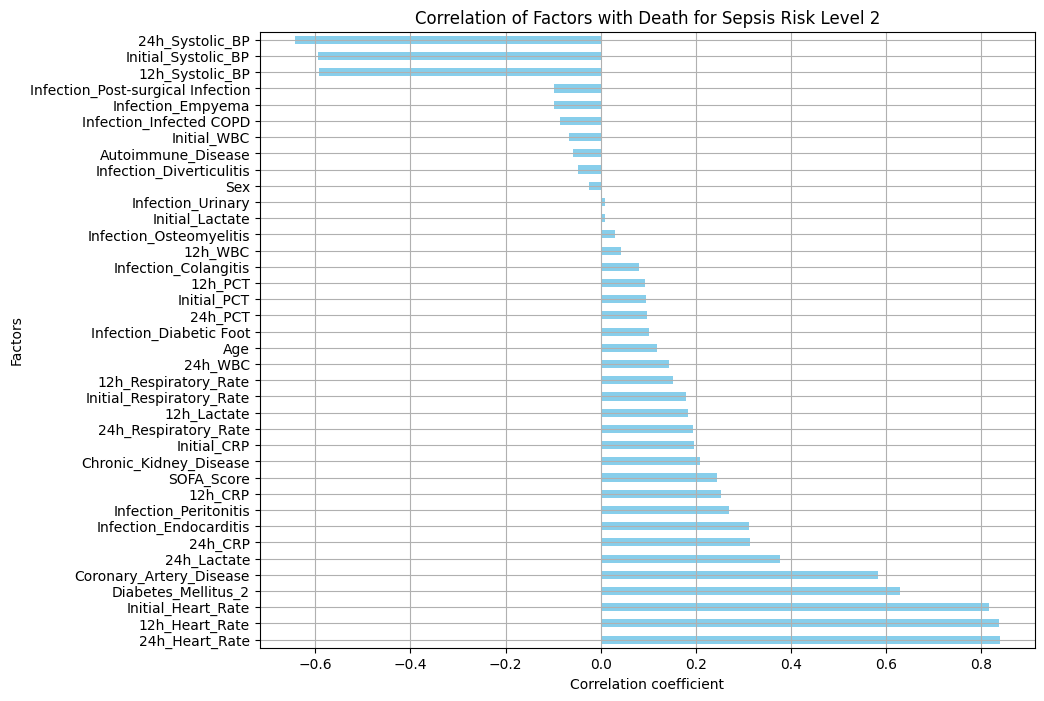

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot of the correlations with 'Death' (FIGURE II)
plt.figure(figsize=(10, 8))
death_correlations.drop('Death').plot(kind='barh', color='skyblue')
plt.title('Correlation of Factors with Death for Sepsis Risk Level 2')
plt.xlabel('Correlation coefficient')
plt.ylabel('Factors')
plt.grid(True)

# Save the plot as a JPEG file
plt.savefig('correlation_with_death.jpeg', format='jpeg', dpi=200)

# Show the plot
plt.show()

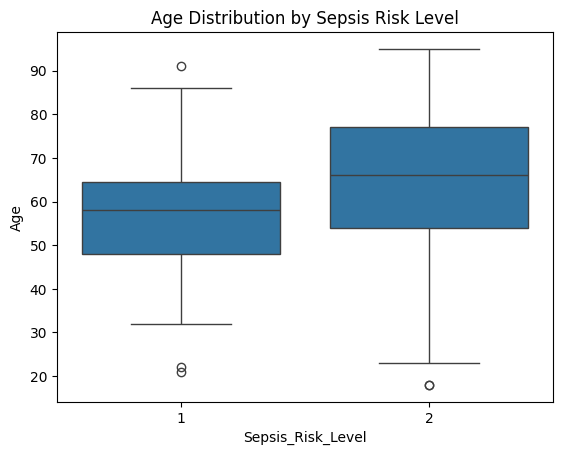

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Age
sns.boxplot(x='Sepsis_Risk_Level', y='Age', data=df_filtered)
plt.title('Age Distribution by Sepsis Risk Level')

# Save the plot as a PNG file
plt.savefig('age_distribution.jpeg', format='jpeg', dpi=200)
plt.show()

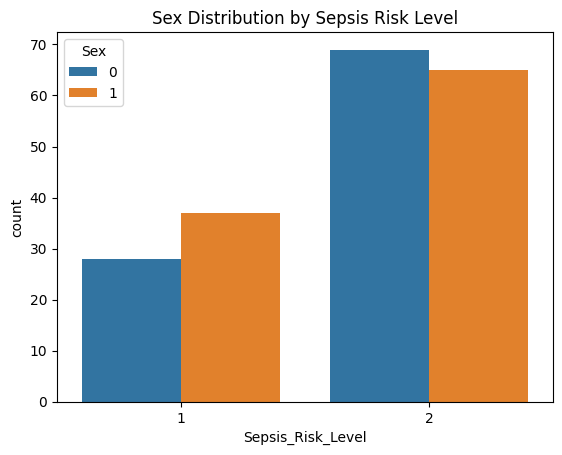

In [ ]:
# Bar chart for Sex
sns.countplot(x='Sepsis_Risk_Level', hue='Sex', data=df_filtered)
plt.title('Sex Distribution by Sepsis Risk Level')

# Save the plot as a PNG file
plt.savefig('sex_distribution.jpeg', format='jpeg', dpi=300)

plt.show()

In [33]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder


# List of clinical variables to analyze
clinical_status = ['Infection_Points', 'Tachycardia_Status', 'Tachypnoea_Status',
                   'WBC_Abnormality_Status', 'CRP_Status', 'PCT_Status',
                   'SOFA_Points', 'Lactate_Status', 'Systolic_BP_Status']

# Prepare the data for multinomial logistic regression
X = df_filtered[clinical_status]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_filtered['Sepsis_Risk_Level']

# Fit multinomial logistic regression model
model = sm.MNLogit(y, X)
result = model.fit()

# Display the results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.118085
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:      Sepsis_Risk_Level   No. Observations:                  199
Model:                        MNLogit   Df Residuals:                      189
Method:                           MLE   Df Model:                            9
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.8151
Time:                        17:53:18   Log-Likelihood:                -23.499
converged:                       True   LL-Null:                       -127.12
Covariance Type:            nonrobust   LLR p-value:                 9.993e-40
   Sepsis_Risk_Level=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -33.7369      8.290     -4.070      0.000     -49.985     

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Filter the data for sepsis risk levels 1 and 2
df_filtered = df[df['Sepsis_Risk_Level'].isin([1, 2])]

# List of clinical variables to analyze
clinical_variables = ['Infection_Points', 'Tachycardia_Status', 'Tachypnoea_Status',
                      'WBC_Abnormality_Status', 'CRP_Status', 'PCT_Status',
                      'SOFA_Points', 'Lactate_Status', 'Systolic_BP_Status']

# Initialize a dictionary to store p-values for sex
p_values_dict_sex = {}

# Perform Chi-square test for each clinical variable with sex
for var in clinical_variables:
    contingency_table = pd.crosstab(df_filtered['Sex'], df_filtered[var])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    p_values_dict_sex[var] = p_value

# Interpretation
for var, p_value in p_values_dict_sex.items():
    if p_value < 0.05:
        significance = "is a statistically significant association"
    else:
        significance = "is no statistically significant association"

    print(f"Chi-square Test p-value for Sex and {var}: {p_value:.6f}")
    print(f"There {significance} between sex and {var}.")

    print()

Chi-square Test p-value for Sex and Infection_Points: 0.134406
There is no statistically significant association between sex and Infection_Points.

Chi-square Test p-value for Sex and Tachycardia_Status: 0.038417
There is a statistically significant association between sex and Tachycardia_Status.

Chi-square Test p-value for Sex and Tachypnoea_Status: 0.920580
There is no statistically significant association between sex and Tachypnoea_Status.

Chi-square Test p-value for Sex and WBC_Abnormality_Status: 0.504580
There is no statistically significant association between sex and WBC_Abnormality_Status.

Chi-square Test p-value for Sex and CRP_Status: 0.180338
There is no statistically significant association between sex and CRP_Status.

Chi-square Test p-value for Sex and PCT_Status: 0.596920
There is no statistically significant association between sex and PCT_Status.

Chi-square Test p-value for Sex and SOFA_Points: 0.023541
There is a statistically significant association between sex 

In [ ]:
import pandas as pd
from scipy.stats import shapiro

# Filter the data for sepsis risk levels 1 and 2
df_filtered = df[df['Sepsis_Risk_Level'].isin([1, 2])]

# List of clinical variables to analyze
clinical_variables = ['Infection_Points', 'Tachycardia_Status', 'Tachypnoea_Status',
                      'WBC_Abnormality_Status', 'CRP_Status', 'PCT_Status',
                      'SOFA_Points', 'Lactate_Status', 'Systolic_BP_Status']

# Initialize a dictionary to store p-values for normality tests
normality_p_values = {}

# Check normality for 'Age' distribution for each clinical variable level
for var in clinical_variables:
    # Split data into groups based on the clinical variable levels
    group1 = df_filtered[df_filtered[var] == 1]['Age']
    group2 = df_filtered[df_filtered[var] == 2]['Age']

    # Perform Shapiro-Wilk test for normality
    stat1, p_value1 = shapiro(group1)
    stat2, p_value2 = shapiro(group2)

    # Store p-values for interpretation
    normality_p_values[var] = {'group1_p_value': p_value1, 'group2_p_value': p_value2}

    # Interpretation of Shapiro-Wilk results
    if p_value1 < 0.05 or p_value2 < 0.05:
        print(f"The age distribution for {var} is not normally distributed (p-value < 0.05) in at least one group.")
    else:
        print(f"The age distribution for {var} is normally distributed (p-value >= 0.05) in both groups.")

    print()

The age distribution for Infection_Points is not normally distributed (p-value < 0.05) in at least one group.

The age distribution for Tachycardia_Status is normally distributed (p-value >= 0.05) in both groups.

The age distribution for Tachypnoea_Status is normally distributed (p-value >= 0.05) in both groups.

The age distribution for WBC_Abnormality_Status is not normally distributed (p-value < 0.05) in at least one group.

The age distribution for CRP_Status is not normally distributed (p-value < 0.05) in at least one group.

The age distribution for PCT_Status is not normally distributed (p-value < 0.05) in at least one group.

The age distribution for SOFA_Points is not normally distributed (p-value < 0.05) in at least one group.

The age distribution for Lactate_Status is normally distributed (p-value >= 0.05) in both groups.

The age distribution for Systolic_BP_Status is not normally distributed (p-value < 0.05) in at least one group.



In [ ]:
import pandas as pd
from scipy.stats import kruskal, f_oneway

# Filter the data for sepsis risk levels 1 and 2
df_filtered = df[df['Sepsis_Risk_Level'].isin([1, 2])]

# Lists to store the results
kruskal_results = {}
anova_results = {}

# Perform the appropriate test for each variable
for var, p_values in normality_p_values.items():
    group1 = df_filtered[df_filtered[var] == 1]['Age']
    group2 = df_filtered[df_filtered[var] == 2]['Age']

    if p_values['group1_p_value'] < 0.05 or p_values['group2_p_value'] < 0.05:
        # Use Kruskal-Wallis test for non-normally distributed variables
        stat, p_value = kruskal(group1, group2)
        kruskal_results[var] = p_value
        print(f"Kruskal-Wallis Test p-value for Age and {var}: {p_value:.6f}")
    else:
        # Use ANOVA for normally distributed variables
        stat, p_value = f_oneway(group1, group2)
        anova_results[var] = p_value
        print(f"ANOVA Test p-value for Age and {var}: {p_value:.6f}")

    print()

# Interpretation
print("\nKruskal-Wallis Test Results:")
for var, p_value in kruskal_results.items():
    if p_value < 0.05:
        print(f"There is a statistically significant difference in age distribution across {var} levels.")
    else:
        print(f"There is no statistically significant difference in age distribution across {var} levels.")

    print()

print("\nANOVA Test Results:")
for var, p_value in anova_results.items():
    if p_value < 0.05:
        print(f"There is a statistically significant difference in age distribution across {var} levels.")
    else:
        print(f"There is no statistically significant difference in age distribution across {var} levels.")

    print()

Kruskal-Wallis Test p-value for Age and Infection_Points: 0.048734

ANOVA Test p-value for Age and Tachycardia_Status: 0.273580

ANOVA Test p-value for Age and Tachypnoea_Status: 0.843143

Kruskal-Wallis Test p-value for Age and WBC_Abnormality_Status: 0.257103

Kruskal-Wallis Test p-value for Age and CRP_Status: 0.006681

Kruskal-Wallis Test p-value for Age and PCT_Status: 0.653565

Kruskal-Wallis Test p-value for Age and SOFA_Points: 0.028626

ANOVA Test p-value for Age and Lactate_Status: 0.099177

Kruskal-Wallis Test p-value for Age and Systolic_BP_Status: 0.015550


Kruskal-Wallis Test Results:
There is a statistically significant difference in age distribution across Infection_Points levels.

There is no statistically significant difference in age distribution across WBC_Abnormality_Status levels.

There is a statistically significant difference in age distribution across CRP_Status levels.

There is no statistically significant difference in age distribution across PCT_Status le

**CHECK IF THERE ARE ANY MISSING VARIABLES FROM THE FEATURE ENGINEERING PROCESS**

In [30]:
# Check for missing values again to ensure consistency after Feature engineering
missing_values_count = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values count per column:")
print(missing_values_count)

Missing values count per column:
Code                        0
Admission_Date              0
Sex                         0
Age                         0
Diabetes_Mellitus_2         0
Chronic_Kidney_Disease      0
Coronary_Artery_Disease     0
Autoimmune_Disease          0
Infection                   0
Initial_Systolic_BP         0
Initial_Heart_Rate          0
Initial_Respiratory_Rate    0
12h_Systolic_BP             0
12h_Heart_Rate              0
24h_Systolic_BP             0
24h_Heart_Rate              0
Initial_Lactate             0
24h_Lactate                 0
Initial_WBC                 0
24h_WBC                     0
Initial_CRP                 0
24h_CRP                     0
Initial_PCT                 0
SOFA_Score                  0
Death                       0
12h_Respiratory_Rate        0
24h_Respiratory_Rate        0
12h_PCT                     0
24h_PCT                     0
12h_Lactate                 0
12h_WBC                     0
12h_CRP                     0
Age_Poi

In [31]:
import pandas as pd
import numpy as np

# Define patterns for relevant columns
patterns = [
    'Initial', '12h', '24h'
]

# Extract columns that start with the specified patterns
time_series_columns = [col for col in df_filtered.columns if any(col.startswith(pattern) for pattern in patterns)]

# Function to normalize the data using min-max scaling
def min_max_normalize(df_filtered, columns):
    normalized_df = df_filtered.copy()
    for col in columns:
        min_val = df_filtered[col].min()
        max_val = df_filtered[col].max()
        if max_val - min_val > 0:  # Avoid division by zero
            normalized_df[col] = (df_filtered[col] - min_val) / (max_val - min_val)
        else:
            normalized_df[col] = 0  # If all values are the same, normalize to 0
    return normalized_df

# Apply min-max normalization to the relevant columns
if time_series_columns:
    normalized_df = min_max_normalize(df_filtered, time_series_columns)

    # Update the original dataframe with normalized values
    df_filtered.update(normalized_df[time_series_columns])

    # Display the normalized data
    print("Normalized Data:")
    print(normalized_df[time_series_columns].head())

Normalized Data:
   Initial_Systolic_BP  Initial_Heart_Rate  Initial_Respiratory_Rate  \
0             0.487179            0.569620                  0.727273   
1             0.589744            0.278481                  0.090909   
2             0.205128            0.607595                  0.090909   
3             0.461538            0.405063                  0.136364   
4             0.487179            0.278481                  0.136364   

   12h_Systolic_BP  12h_Heart_Rate  24h_Systolic_BP  24h_Heart_Rate  \
0         0.468085        0.478261         0.500000        0.425532   
1         0.638298        0.228261         0.604167        0.212766   
2         0.202128        0.510870         0.229167        0.457447   
3         0.414894        0.336957         0.479167        0.308511   
4         0.531915        0.228261         0.500000        0.212766   

   Initial_Lactate  24h_Lactate  Initial_WBC  ...  Initial_CRP   24h_CRP  \
0         0.738318     0.326285     0.714974  .

In [33]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

# Define time points and features
time_points = ['Initial', '12h', '24h']
features = [
    'Systolic_BP', 'Heart_Rate', 'Respiratory_Rate',
    'Lactate', 'WBC', 'CRP', 'PCT'
]

# Extract sequences for each row in the normalized DataFrame
def create_sequences(df, time_points, features):
    sequences = []

    for index, row in df.iterrows():
        row_sequences = []
        for time_point in time_points:
            time_point_data = []
            for feature in features:
                column_name = f'{time_point}_{feature}'
                if column_name in df.columns:
                    time_point_data.append(row[column_name])
            row_sequences.append(time_point_data)
        sequences.append(row_sequences)

    return sequences

# Create sequences from the normalized DataFrame
sequences = create_sequences(normalized_df, time_points, features)

# Convert list of sequences into a NumPy array
sequences_np = np.array(sequences)  # Shape: (num_samples, num_time_points, num_features)

# Print the shape of the sequences
print(f"Shape of sequences_np: {sequences_np.shape}")

# Pad sequences if necessary (assuming they are already of consistent length here)
def pad_sequences(sequences, max_len=None):
    if max_len is None:
        max_len = max(len(seq) for seq in sequences)

    num_features = len(sequences[0][0])
    padded_sequences = np.zeros((len(sequences), max_len, num_features))  # Shape: (num_sequences, time_steps, num_features)

    for i, seq in enumerate(sequences):
        length = len(seq)
        padded_sequences[i, :length, :] = seq

    return padded_sequences

# Pad sequences
X_time_series = pad_sequences(sequences)
print(f"Shape of padded X_time_series: {X_time_series.shape}")

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_time_series, dtype=torch.float32)

# Create a dataset and dataloader
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=2, shuffle=False)  # Example batch size

# Example of how to use dataloader
for batch in dataloader:
    X_batch = batch[0]
    print(f"Batch shape: {X_batch.shape}")
    break

Shape of sequences_np: (199, 3, 7)
Shape of padded X_time_series: (199, 3, 7)
Batch shape: torch.Size([2, 3, 7])


In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the LSTM model for feature extraction
class LSTMFeatureExtractor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, pooling='mean'):
        super(LSTMFeatureExtractor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.pooling = pooling

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))

        if self.pooling == 'mean':
            out = torch.mean(out, dim=1)  # Mean pooling
        elif self.pooling == 'max':
            out = torch.max(out, dim=1)[0]  # Max pooling
        else:
            raise ValueError("Invalid pooling type. Choose 'mean' or 'max'.")

        return out

In [35]:
# Parameters
input_size = 7
hidden_size = 30
num_layers = 2
learning_rate = 0.001
num_epochs = 10

# Initialize the feature extractor model
feature_extracted = LSTMFeatureExtractor(input_size, hidden_size, num_layers, pooling='mean')

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(feature_extracted.parameters(), lr=learning_rate)

# Convert to PyTorch tensors
X_time_series_tensor = torch.tensor(X_time_series, dtype=torch.float32)
y_tensor = torch.tensor(df_filtered['Sepsis_Risk_Level'].values, dtype=torch.long)

# Create dataset and dataloader
dataset = TensorDataset(X_time_series_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=2, shuffle=False)

# Training the model
feature_extracted.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for batch in dataloader:
        X_batch, y_batch = batch

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = feature_extracted(X_batch)

        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader):.4f}')

# Save the feature extractor model
torch.save(feature_extracted.state_dict(), 'feature_extracted.pth')

Epoch 1/10, Loss: 2.9419
Epoch 2/10, Loss: 2.1289
Epoch 3/10, Loss: 1.9845
Epoch 4/10, Loss: 1.9330
Epoch 5/10, Loss: 1.9107
Epoch 6/10, Loss: 1.9000
Epoch 7/10, Loss: 1.8942
Epoch 8/10, Loss: 1.8907
Epoch 9/10, Loss: 1.8886
Epoch 10/10, Loss: 1.8871


In [36]:
# Load the trained model
feature_extracted.load_state_dict(torch.load('feature_extracted.pth'))
feature_extracted.eval()

# Extract features and verify shape
with torch.no_grad():
    X_features = feature_extracted(X_time_series_tensor)

print(f"Extracted Features Shape: {X_features.shape}")

Extracted Features Shape: torch.Size([199, 30])


<ipython-input-36-ad25da7dd946>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  feature_extracted.load_state_dict(torch.load('feature_extracted.pth'))


In [37]:
# Get a sample from the data loader
sample_batch, _ = next(iter(dataloader))

# Get features directly from the model
with torch.no_grad():
    features_from_model = feature_extracted(sample_batch).numpy()

# Compare with extracted features
print("Features from the model (first 5):")
print(features_from_model[:5])

Features from the model (first 5):
[[-0.906403    0.9054479   0.90604734 -0.90646714 -0.90610665 -0.9064227
  -0.9062776  -0.90631396 -0.9062262  -0.9060736  -0.9062249  -0.90649897
  -0.90643007 -0.9064966  -0.9063428  -0.90647984 -0.90637255 -0.90611583
  -0.9063716  -0.90616226 -0.90629506 -0.9061882  -0.90642136 -0.9062844
  -0.90650177 -0.90627855 -0.9063978  -0.90616983 -0.9065976  -0.9063273 ]
 [-0.9044695   0.9018027   0.9033782  -0.9046888  -0.9035881  -0.90472096
  -0.90403944 -0.90423423 -0.90386724 -0.9035407  -0.9039553  -0.9049936
  -0.904716   -0.9050744  -0.9043498  -0.9049117  -0.90448266 -0.9036186
  -0.9044972  -0.90364724 -0.9041812  -0.9038394  -0.90463537 -0.9044027
  -0.9048111  -0.9040663  -0.9043663  -0.90391237 -0.9052995  -0.9043332 ]]


In [38]:
import numpy as np

# Save the extracted features to a file
np.save('extracted_features.npy', feature_extracted)

# Load the features when needed
#loaded_features = np.load('extracted_features.npy')

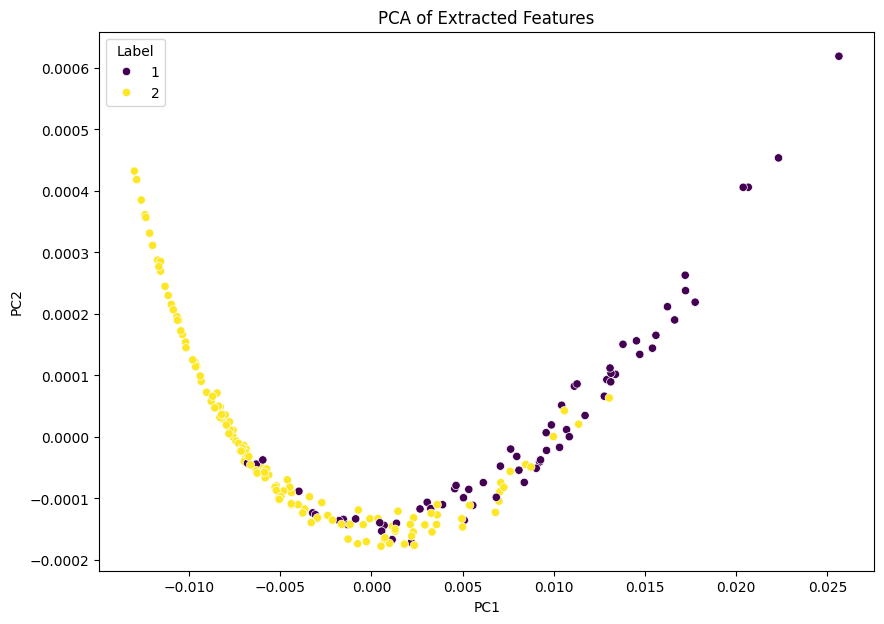

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib

X_features = X_features.numpy()

# Initialize PCA to reduce to 2 dimensions
pca = PCA(n_components=2)

# Fit and transform the features
X_pca = pca.fit_transform(X_features)


# Save the PCA model to a file
joblib.dump(pca, 'pca_model.pkl')

# Convert to DataFrame
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Label'] = df_filtered['Sepsis_Risk_Level'].values

# Plot the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_pca, palette='viridis')
plt.title('PCA of Extracted Features')

# Display the plot
plt.show()

In [40]:
# Get the variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

print(f'Explained variance ratio by component: {explained_variance_ratio}')
print(f'Total explained variance: {explained_variance_ratio.sum()}')

Explained variance ratio by component: [9.9963945e-01 3.1278923e-04]
Total explained variance: 0.9999522566795349


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Convert PCA results to DataFrame
features_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Define the categorical columns
categorical_columns = [
    'Sex', 'Diabetes_Mellitus_2', 'Chronic_Kidney_Disease', 'Coronary_Artery_Disease',
    'Autoimmune_Disease', 'Infection', 'Tachycardia_Status', 'Tachypnoea_Status',
    'WBC_Abnormality_Status', 'CRP_Status', 'PCT_Status', 'Lactate_Status', 'Systolic_BP_Status'
]

# Define the non-time-series columns (including categorical columns)
non_time_series_columns = [
    'Sex', 'Age', 'Diabetes_Mellitus_2', 'Chronic_Kidney_Disease', 'Coronary_Artery_Disease',
    'Autoimmune_Disease', 'Infection', 'Age_Points', 'Comorbidity_Points', 'Predisposition_Points',
    'Infection_Points', 'Tachycardia_Status', 'Tachypnoea_Status', 'WBC_Abnormality_Status',
    'CRP_Status', 'PCT_Status', 'Response_Points', 'SOFA_Score', 'SOFA_Points', 'Lactate_Status', 'Systolic_BP_Status',
    'Organ_Dysfunction_Points', 'PIRO_Score'
]

# Extract non-time-series features and labels from df_filtered
non_time_series_features = df_filtered[non_time_series_columns]
labels = df_filtered['Sepsis_Risk_Level']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Apply one-hot encoding to categorical columns
encoded_categorical_features = encoder.fit_transform(non_time_series_features[categorical_columns])

# Create a DataFrame from the encoded features
encoded_categorical_df = pd.DataFrame(encoded_categorical_features, columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns from non_time_series_features
non_time_series_features = non_time_series_features.drop(columns=categorical_columns)

# Combine encoded categorical features with the remaining non-time-series features
combined_non_time_series_features = pd.concat([non_time_series_features.reset_index(drop=True), encoded_categorical_df], axis=1)

# Combine the PCA features with the combined non-time-series features
combined_features = pd.concat([features_df, combined_non_time_series_features], axis=1)

# Print the shape of the combined features
print(f"Shape of combined features: {combined_features.shape}")

Shape of combined features: (199, 54)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
# Shape of PCA features
print(f"Shape of PCA features: {features_df.shape}")

# Shape of non-time-series features after encoding
print(f"Shape of encoded categorical features: {encoded_categorical_df.shape}")
print(f"Shape of non-time-series features (without encoded columns): {non_time_series_features.shape}")

# Combined shape
combined_non_time_series_features = pd.concat([non_time_series_features.reset_index(drop=True), encoded_categorical_df], axis=1)
print(f"Shape of combined non-time-series features: {combined_non_time_series_features.shape}")

# Final combined features shape
combined_features = pd.concat([features_df.reset_index(drop=True), combined_non_time_series_features], axis=1)
print(f"Shape of combined features: {combined_features.shape}")

Shape of PCA features: (199, 2)
Shape of encoded categorical features: (199, 42)
Shape of non-time-series features (without encoded columns): (199, 10)
Shape of combined non-time-series features: (199, 52)
Shape of combined features: (199, 54)


In [ ]:
(combined_features.head())

,PC1,PC2,Age,Age_Points,Comorbidity_Points,Predisposition_Points,Infection_Points,Response_Points,SOFA_Score,SOFA_Points,...,CRP_Status_2,PCT_Status_0,PCT_Status_1,PCT_Status_2,Lactate_Status_0,Lactate_Status_1,Lactate_Status_2,Systolic_BP_Status_0,Systolic_BP_Status_1,Systolic_BP_Status_2
0,-0.010227,0.000230,48,2,0,2,1,10,16,2,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.000056,-0.000112,66,3,0,3,1,6,9,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.015816,0.000194,74,3,0,3,2,5,14,2,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.010037,0.000004,83,3,1,4,2,6,8,1,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.003485,-0.000102,78,3,0,3,1,6,9,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Splits data into training (70%), validation (20%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(combined_features, labels, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Print shapes of the datasets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

# Check the class distribution before SMOTE
print("\nClass distribution in training set before SMOTE:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the shape of the resampled training data
print("\nShape of X_resampled after SMOTE:", X_resampled.shape)
print("Shape of y_resampled after SMOTE:", y_resampled.shape)

# Check the class distribution after SMOTE
print("\nClass distribution in training set after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Training data shape: (139, 54)
Validation data shape: (40, 54)
Test data shape: (20, 54)

Class distribution in training set before SMOTE:
Sepsis_Risk_Level
2    87
1    52
Name: count, dtype: int64

Shape of X_resampled after SMOTE: (174, 54)
Shape of y_resampled after SMOTE: (174,)

Class distribution in training set after SMOTE:
Sepsis_Risk_Level
2    87
1    87
Name: count, dtype: int64


### **RANDOM FOREST MODEL**

In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the resampled training data
clf.fit(X_resampled, y_resampled)

# Make predictions on the validation set
y_val_pred = clf.predict(X_val)

# Evaluate the classifier on the validation set
print("Validation set accuracy:", accuracy_score(y_val, y_val_pred))

Validation set accuracy: 1.0


In [45]:
# Make predictions on the test set
y_test_pred = clf.predict(X_test)

# Evaluate the classifier on the test set
print("Test set accuracy:", accuracy_score(y_test, y_test_pred))

Test set accuracy: 1.0


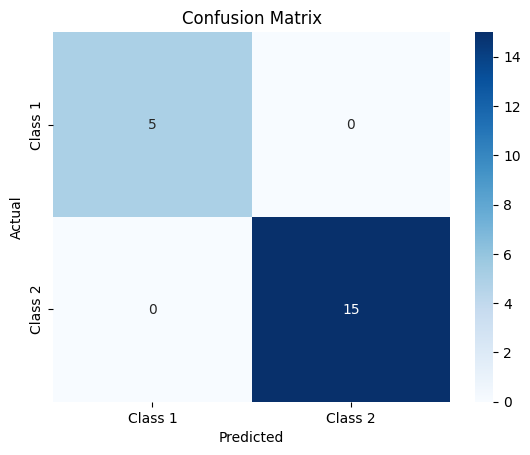

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Save the plot as a JPEG file
plt.savefig('confusion_matrix.jpeg', format='jpeg', dpi=300)

# Show the plot
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix

# Predict probabilities for the test set
y_test_prob = clf.predict_proba(X_test)[:, 1]

# Predict the class labels for the test set
y_test_pred = clf.predict(X_test)

# Calculate AUROC
auroc = roc_auc_score(y_test, y_test_prob)

# Calculate Sensitivity (Recall)
sensitivity = recall_score(y_test, y_test_pred)

# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)

# Print the results
print(f"Test Set | AUROC: {auroc:.4f} | Sensitivity (Recall): {sensitivity:.4f} | Specificity: {specificity:.4f}")

Test Set | AUROC: 1.0000 | Sensitivity (Recall): 1.0000 | Specificity: 1.0000


In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, combined_features, labels, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.95       1.         1.         1.         0.97435897]
Mean cross-validation score: 0.9848717948717949


<ipython-input-49-09ba3fca65c9>:11: RuntimeWarning: divide by zero encountered in scalar divide
  net_benefit = (tp / n) - (fp / n) * (threshold / (1 - threshold))
<ipython-input-49-09ba3fca65c9>:11: RuntimeWarning: invalid value encountered in scalar multiply
  net_benefit = (tp / n) - (fp / n) * (threshold / (1 - threshold))


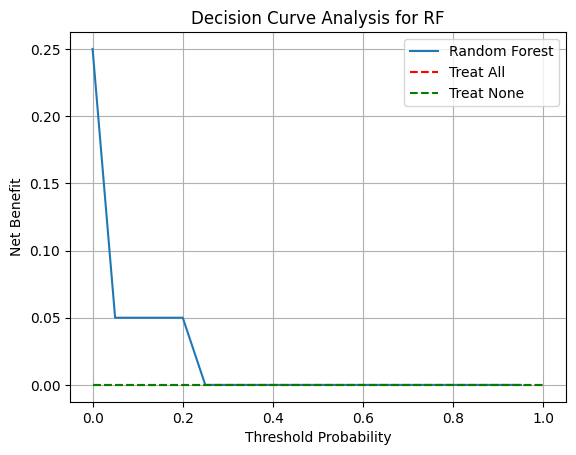

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate net benefit
def calculate_net_benefit(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    n = len(y_true)

    net_benefit = (tp / n) - (fp / n) * (threshold / (1 - threshold))
    return net_benefit

# Vary the threshold probability and calculate net benefit
thresholds = np.arange(0.0, 1.05, 0.05)
net_benefits = [calculate_net_benefit(y_test, clf.predict_proba(X_test)[:, 1], t) for t in thresholds]

# Plot the Decision Curve
plt.plot(thresholds, net_benefits, label='Random Forest')
plt.plot(thresholds, thresholds - thresholds, 'r--', label='Treat All')
plt.plot(thresholds, np.zeros_like(thresholds), 'g--', label='Treat None')
plt.xlabel('Threshold Probability')
plt.ylabel('Net Benefit')
plt.title('Decision Curve Analysis for RF')
plt.legend()
plt.grid(True)

# Save the plot as a JPEG file
#plt.savefig('decision_curve_analysis_rf.jpeg', format='jpeg', dpi=300)

plt.show()

<ipython-input-87-8a5475f804ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


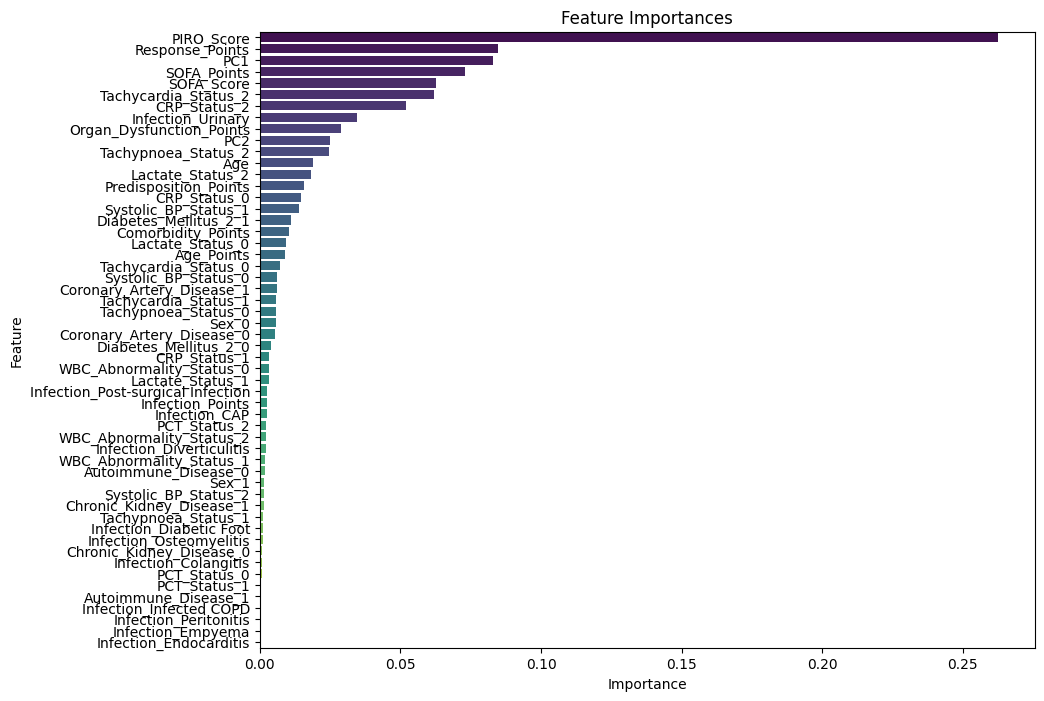

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Save the plot as a JPEG file
plt.savefig('feature_importances.jpeg', format='jpeg', dpi=300)

# Show the plot
plt.show()

In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 1.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [50]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into training (70%), validation (20%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(combined_features, labels, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Convert labels: 1 -> 0 (Intermediate Risk), 2 -> 1 (Critical Risk)
y_train_binary = (y_train == 2).astype(int)
y_val_binary = (y_val == 2).astype(int)
y_test_binary = (y_test == 2).astype(int)

# Create DMatrix objects for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train_binary)
dval = xgb.DMatrix(X_val, label=y_val_binary)
dtest = xgb.DMatrix(X_test, label=y_test_binary)

# Parameters for the XGBoost model
params = {
    'objective': 'binary:logistic',  # for binary classification
    'eval_metric': 'logloss',        # evaluation metric
    'scale_pos_weight': 2,           # to handle class imbalance
    'eta': 0.01,                     # learning rate
    'max_depth': 8,                  # maximum depth of trees
    'subsample': 0.8,                # fraction of data to use for training
    'colsample_bytree': 0.8,         # fraction of features to use for training
    'alpha': 0.5,                    # L1 regularization term
    'lambda': 5.0,                   # L2 regularization term (can adjust if needed)
    'random_state': 42               # for reproducibility
}

# Specify the evaluation set
evals = [(dtrain, 'train'), (dval, 'eval')]

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10)

[0]	train-logloss:0.68831	eval-logloss:0.55606
[1]	train-logloss:0.67994	eval-logloss:0.54955
[2]	train-logloss:0.67204	eval-logloss:0.54337
[3]	train-logloss:0.66418	eval-logloss:0.53724
[4]	train-logloss:0.65948	eval-logloss:0.53401
[5]	train-logloss:0.65167	eval-logloss:0.52790
[6]	train-logloss:0.64677	eval-logloss:0.52453
[7]	train-logloss:0.64184	eval-logloss:0.52164
[8]	train-logloss:0.63458	eval-logloss:0.51592
[9]	train-logloss:0.62707	eval-logloss:0.51005
[10]	train-logloss:0.62281	eval-logloss:0.50700
[11]	train-logloss:0.61552	eval-logloss:0.50127
[12]	train-logloss:0.60878	eval-logloss:0.49593
[13]	train-logloss:0.60552	eval-logloss:0.49328
[14]	train-logloss:0.60104	eval-logloss:0.49068
[15]	train-logloss:0.59411	eval-logloss:0.48524
[16]	train-logloss:0.58742	eval-logloss:0.47995
[17]	train-logloss:0.58100	eval-logloss:0.47488
[18]	train-logloss:0.57464	eval-logloss:0.46984
[19]	train-logloss:0.56836	eval-logloss:0.46486
[20]	train-logloss:0.56230	eval-logloss:0.46003
[2

In [51]:
# Predict probabilities for the validation set
y_val_prob = model.predict(dval)
y_val_pred = (y_val_prob >= 0.5).astype(int)

# Evaluate the accuracy
accuracy_val = accuracy_score(y_val_binary, y_val_pred)

# Print val accuracy
print(f"Validation Set Accuracy: {accuracy_val:.4f}")

Validation Set Accuracy: 1.0000


In [52]:
# Predict probabilities for the test set
y_test_prob = model.predict(dtest)
y_test_pred = (y_test_prob >= 0.5).astype(int)

# Evaluate the accuracy
accuracy = accuracy_score(y_test_binary, y_test_pred)

# Print test accuracy
print(f"Test Set Accuracy: {accuracy:.4f}")

Test Set Accuracy: 1.0000


In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix

# Predict probabilities for the test set
y_test_prob = model.predict(dtest)

# Apply a threshold to convert probabilities to class labels
y_test_pred = (y_test_prob >= 0.5).astype(int)

# Calculate AUROC
auroc = roc_auc_score(y_test_binary, y_test_prob)

# Calculate Sensitivity (Recall)
sensitivity = recall_score(y_test_binary, y_test_pred)

# Calculate Specificity
# Specificity can be derived from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test_binary, y_test_pred).ravel()
specificity = tn / (tn + fp)

print(f"Test Set | AUROC: {auroc:.4f} | Sensitivity (Recall): {sensitivity:.4f} | Specificity: {specificity:.4f}")

Test Set | AUROC: 1.0000 | Sensitivity (Recall): 1.0000 | Specificity: 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb.XGBClassifier(**params), X_train, y_train_binary, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [1.         1.         1.         1.         0.88888889]
Mean cross-validation score: 0.9778


In [53]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 5  0]
 [ 0 15]]


<ipython-input-106-9c48548df41c>:11: RuntimeWarning: divide by zero encountered in scalar divide
  net_benefit = (tp / n) - (fp / n) * (threshold / (1 - threshold))
<ipython-input-106-9c48548df41c>:11: RuntimeWarning: invalid value encountered in scalar multiply
  net_benefit = (tp / n) - (fp / n) * (threshold / (1 - threshold))


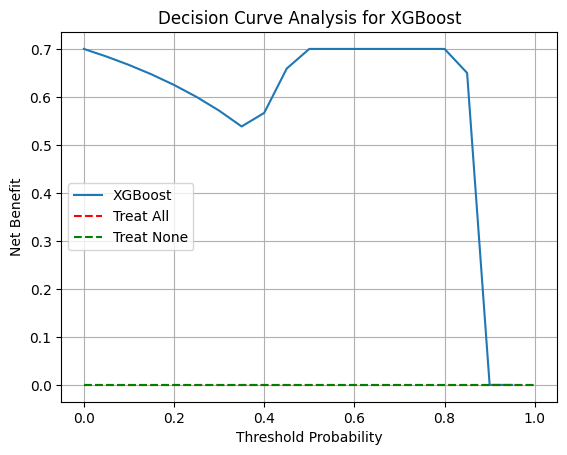

In [ ]:
# Predict probabilities for the test set
y_prob_test = model.predict(dtest)

# Define a function to calculate net benefit
def calculate_net_benefit(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    n = len(y_true)

    net_benefit = (tp / n) - (fp / n) * (threshold / (1 - threshold))
    return net_benefit

# Perform Decision Curve Analysis (DCA)
thresholds = np.arange(0.0, 1.05, 0.05)
net_benefits = [calculate_net_benefit(y_test_binary, y_prob_test, t) for t in thresholds]

# Plot the Decision Curve
plt.plot(thresholds, net_benefits, label='XGBoost')
plt.plot(thresholds, thresholds - thresholds, 'r--', label='Treat All')
plt.plot(thresholds, np.zeros_like(thresholds), 'g--', label='Treat None')
plt.xlabel('Threshold Probability')
plt.ylabel('Net Benefit')
plt.title('Decision Curve Analysis for XGBoost')
plt.legend()
plt.grid(True)

# Save the plot as a JPEG file
#plt.savefig('decision_curve_analysis_xgboost.jpeg', format='jpeg', dpi=300)

plt.show()

**SAVE TRAINED RANDOM FOREST MODEL (Benchmark classifier) FOR DEPLOYMENT**

In [54]:
import joblib

# Save the trained model to a file
model_filename = 'random_forest_sepsis_risk_model.pkl'
joblib.dump(clf, model_filename)

print(f"Model saved to {model_filename}")

Model saved to random_forest_sepsis_risk_model.pkl


In [ ]:
import joblib

# Load the model from the file
model_filename = 'random_forest_sepsis_risk_model.pkl'
clf = joblib.load(model_filename)

print("Model loaded successfully.")

Model loaded successfully.


### **PRACTICAL APPLICATION OF MODEL ON NEW PATIENTS DATA (DEPLOYMENT)**

In [55]:
# Example DataFrame setup
data = {
    'Sex': [0, 1, 1],
    'Age': [70, 50, 30],
    'Diabetes_Mellitus_2': [1, 0, 1],
    'Chronic_Kidney_Disease': [1, 0, 0],
    'Coronary_Artery_Disease': [0, 1, 0],
    'Autoimmune_Disease': [0, 0, 1],
    'Infection': ['CAP', 'Urinary', 'Empyema'],
    'Initial_Heart_Rate': [95, 80, 85],
    '12h_Heart_Rate': [90, 85, 88],
    '24h_Heart_Rate': [100, 88, 92],
    'Initial_Respiratory_Rate': [22, 18, 19],
    '12h_Respiratory_Rate': [24, 19, 20],
    '24h_Respiratory_Rate': [25, 20, 21],
    'Initial_WBC': [13000, 9000, 5000],
    '12h_WBC': [12500, 8500, 5200],
    '24h_WBC': [13500, 8000, 4800],
    'Initial_CRP': [8, 6, 5],
    '12h_CRP': [9, 7, 4],
    '24h_CRP': [10, 5, 3],
    'Initial_PCT': [0.4, 0.3, 0.2],
    '12h_PCT': [0.5, 0.4, 0.3],
    '24h_PCT': [0.6, 0.5, 0.4],
    'Initial_Lactate': [1.5, 1.0, 0.9],
    '12h_Lactate': [2.1, 1.2, 1.0],
    '24h_Lactate': [2.5, 1.3, 1.1],
    'SOFA_Score': [8, 10, 15],
    'Initial_Systolic_BP': [95, 110, 105],
    '12h_Systolic_BP': [90, 105, 100],
    '24h_Systolic_BP': [85, 100, 95]
}

df_new_patient = pd.DataFrame(data)

In [56]:
import pandas as pd

# Calculate PIRO Components Function
def calculate_piro_components(df_new):
    # Define thresholds
    thresholds = {
        'Heart_Rate': 90,
        'Respiratory_Rate': 20,
        'WBC_high': 12000,
        'WBC_low': 4000,
        'CRP': 7.9,
        'PCT': 0.6,
        'Lactate': 2,
        'Systolic_BP': 100
    }

    # Function to calculate status over three time points
    def calculate_status(df_new, key, upper_threshold, lower_threshold=None, new_key=None):
        status_list = []
        for time in ['Initial', '12h', '24h']:
            col_name = f'{time}_{key}'
            if lower_threshold is not None:
                df_new[col_name + '_Status'] = df_new[col_name].apply(
                    lambda x: 2 if x > upper_threshold or x < lower_threshold else 1 if x != 0 else 0)
            else:
                df_new[col_name + '_Status'] = df_new[col_name].apply(
                    lambda x: 2 if x > upper_threshold else 1 if x != 0 else 0)
            status_list.append(col_name + '_Status')

        # Aggregate to get a final status based on all time points
        final_key = new_key if new_key else key + '_Status'
        df_new[final_key] = df_new[status_list].max(axis=1)

    # Apply status calculations for each indicator
    calculate_status(df_new, 'Heart_Rate', thresholds['Heart_Rate'], new_key='Tachycardia_Status')
    calculate_status(df_new, 'Respiratory_Rate', thresholds['Respiratory_Rate'], new_key='Tachypnoea_Status')
    calculate_status(df_new, 'WBC', thresholds['WBC_high'], thresholds['WBC_low'], new_key='WBC_Abnormality_Status')
    calculate_status(df_new, 'CRP', thresholds['CRP'])
    calculate_status(df_new, 'PCT', thresholds['PCT'])
    calculate_status(df_new, 'Lactate', thresholds['Lactate'])
    calculate_status(df_new, 'Systolic_BP', thresholds['Systolic_BP'])

    # Response points calculation
    response_factors = ['Tachycardia_Status', 'Tachypnoea_Status', 'WBC_Abnormality_Status', 'CRP_Status', 'PCT_Status']
    df_new['Response_Points'] = df_new[response_factors].sum(axis=1)

    # Infection points
    infection_points_dict = {
        'CAP': 2, 'Colangitis': 1, 'Diverticulitis': 1, 'Endocarditis': 1,
        'Osteomyelitis': 1, 'Peritonitis': 1, 'Empyema': 1, 'Infected COPD': 1,
        'Diabetic Foot': 1, 'Post-surgical Infection': 1, 'Urinary': 1
    }
    df_new['Infection_Points'] = df_new['Infection'].map(infection_points_dict).fillna(0)

    # Predisposition points
    df_new['Age_Points'] = df_new['Age'].apply(lambda x: 3 if x > 65 else 2 if x > 45 else 1)
    comorbidities = ['Diabetes_Mellitus_2', 'Chronic_Kidney_Disease', 'Coronary_Artery_Disease', 'Autoimmune_Disease']
    df_new['Comorbidity_Points'] = df_new[comorbidities].sum(axis=1)
    df_new['Predisposition_Points'] = df_new['Age_Points'] + df_new['Comorbidity_Points']

    # Organ Dysfunction Points
    df_new['SOFA_Points'] = df_new['SOFA_Score'].apply(lambda x: 2 if x > 12 else 1 if x > 2 else 0)
    organ_factors = ['SOFA_Points', 'Lactate_Status', 'Systolic_BP_Status']
    df_new['Organ_Dysfunction_Points'] = df_new[organ_factors].sum(axis=1)

    # Total PIRO Score
    piro_factors = ['Predisposition_Points', 'Infection_Points', 'Response_Points', 'Organ_Dysfunction_Points']
    df_new['PIRO_Score'] = df_new[piro_factors].sum(axis=1)

    return df_new

# Calculate PIRO components for the new patients
df_processed = calculate_piro_components(df_new_patient)

# Display results to check that it is correct
(df_processed[['Age', 'Age_Points', 'Comorbidity_Points', 'Predisposition_Points', 'Infection_Points', 'Tachycardia_Status', 'Tachypnoea_Status', 'WBC_Abnormality_Status', 'CRP_Status', 'PCT_Status', 'Response_Points', 'SOFA_Points', 'Organ_Dysfunction_Points', 'PIRO_Score']])

,Age,Age_Points,Comorbidity_Points,Predisposition_Points,Infection_Points,Tachycardia_Status,Tachypnoea_Status,WBC_Abnormality_Status,CRP_Status,PCT_Status,Response_Points,SOFA_Points,Organ_Dysfunction_Points,PIRO_Score
0,70,3,2,5,2,2,2,2,2,1,9,1,4,20
1,50,2,1,3,1,1,1,1,1,1,5,1,4,13
2,30,1,2,3,1,2,2,1,1,1,7,2,5,16


In [57]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Normalize Time Series Data
def normalize_time_series(df_new):
    scaler = MinMaxScaler()
    time_series_columns = [col for col in df_new.columns if 'Initial_' in col or '12h_' in col or '24h_' in col]
    df_new[time_series_columns] = scaler.fit_transform(df_new[time_series_columns])
    return df_new

# Normalize the time series data for the new patients
df_normalized = normalize_time_series(df_processed)

# Display the normalized time series data
print("Normalized Time Series Data:")
print(df_normalized[time_series_columns].head())

Normalized Time Series Data:
   Initial_Systolic_BP  Initial_Heart_Rate  Initial_Respiratory_Rate  \
0             0.000000            1.000000                      1.00   
1             1.000000            0.000000                      0.00   
2             0.666667            0.333333                      0.25   

   12h_Systolic_BP  12h_Heart_Rate  24h_Systolic_BP  24h_Heart_Rate  \
0         0.000000             1.0         0.000000        1.000000   
1         1.000000             0.0         1.000000        0.000000   
2         0.666667             0.6         0.666667        0.333333   

   Initial_Lactate  24h_Lactate  Initial_WBC  ...  Initial_CRP   24h_CRP  \
0         1.000000     1.000000          1.0  ...     1.000000  1.000000   
1         0.166667     0.142857          0.5  ...     0.333333  0.285714   
2         0.000000     0.000000          0.0  ...     0.000000  0.000000   

   Initial_PCT  12h_Respiratory_Rate  24h_Respiratory_Rate  12h_PCT  24h_PCT  \
0          1

In [58]:
def create_sequences(df_new, time_points, features):
    sequences = []
    for _, row in df_new.iterrows():
        row_sequences = []
        for time_point in time_points:
            time_point_data = []
            for feature in features:
                column_name = f'{time_point}_{feature}'
                if column_name in df_new.columns:
                    time_point_data.append(row[column_name])
            row_sequences.append(time_point_data)
        sequences.append(row_sequences)
    return sequences

def pad_sequences(sequences, max_len=None):
    if max_len is None:
        max_len = max(len(seq) for seq in sequences)
    num_features = len(sequences[0][0])
    padded_sequences = np.zeros((len(sequences), max_len, num_features))
    for i, seq in enumerate(sequences):
        length = len(seq)
        padded_sequences[i, :length, :] = seq
    return padded_sequences

In [59]:
# Define the time points and features you're interested in
time_points = ['Initial', '12h', '24h']
features = ['Heart_Rate', 'Respiratory_Rate', 'WBC', 'CRP', 'PCT', 'Lactate', 'Systolic_BP']

# Create sequences from the normalized time series data
sequences = create_sequences(df_normalized, time_points, features)

# Pad the sequences if necessary
X_time_series = pad_sequences(sequences)

# Convert to PyTorch tensor
X_tensor = torch.tensor(X_time_series, dtype=torch.float32)

# Display the shape of the time series data for verification
print("Shape of Time Series Data for LSTM input:", X_time_series.shape)

Shape of Time Series Data for LSTM input: (3, 3, 7)


In [60]:
# Load the LSTM model
input_size = 7
hidden_size = 30
num_layers = 2

lstm_model = LSTMFeatureExtractor(input_size, hidden_size, num_layers, pooling='mean')
lstm_model.load_state_dict(torch.load('feature_extracted.pth'))
lstm_model.eval()  # Set the model to evaluation mode

# Extract features with LSTM
with torch.no_grad():
    X_features_new = lstm_model(X_tensor).numpy()  # Convert to NumPy array


# Print the shape of the extracted features
print(f"Shape of the extracted features: {X_features_new.shape}")

Shape of the extracted features: (3, 30)


<ipython-input-60-5887d407d29e>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_model.load_state_dict(torch.load('feature_extracted.pth'))


In [61]:
import joblib
import pandas as pd

# Load the saved PCA model
pca_model = joblib.load('pca_model.pkl')

with torch.no_grad():
    X_features_new = lstm_model(X_tensor).numpy()  # Extract features for new data

# Apply the loaded PCA model to the new features
X_pca_new = pca_model.transform(X_features_new)

# Convert to DataFrame to use in further steps
df_pca_new = pd.DataFrame(data=X_pca_new, columns=['PC1', 'PC2'])

# Display the shape of the PCA-transformed features
print(f"Shape of PCA-transformed features: {X_pca_new.shape}")

# Optional: Display the transformed features
print("PCA-transformed features for the new data:")
print(df_pca_new.head())

Shape of PCA-transformed features: (3, 2)
PCA-transformed features for the new data:
        PC1       PC2
0 -0.013755  0.000544
1 -0.006415 -0.000010
2  0.011674  0.000090


In [62]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Define the expected columns based on the original training data
expected_columns = [
    'Age', 'Age_Points', 'Comorbidity_Points',
    'Predisposition_Points', 'Infection_Points', 'Response_Points',
    'SOFA_Score', 'SOFA_Points', 'Organ_Dysfunction_Points', 'PIRO_Score',
    'Sex_0', 'Sex_1', 'Diabetes_Mellitus_2_0', 'Diabetes_Mellitus_2_1',
    'Chronic_Kidney_Disease_0', 'Chronic_Kidney_Disease_1',
    'Coronary_Artery_Disease_0', 'Coronary_Artery_Disease_1',
    'Autoimmune_Disease_0', 'Autoimmune_Disease_1', 'Infection_CAP',
    'Infection_Empyema', 'Infection_Urinary', 'Infection_Colangitis', 'Infection_Diabetic Foot', 'Infection_Diverticulitis',
    'Infection_Endocarditis', 'Infection_Infected COPD', 'Infection_Osteomyelitis',
    'Infection_Peritonitis', 'Infection_Post-surgical Infection', 'Tachycardia_Status_0',
    'Tachycardia_Status_1', 'Tachycardia_Status_2', 'Tachypnoea_Status_0',
    'Tachypnoea_Status_1', 'Tachypnoea_Status_2', 'WBC_Abnormality_Status_0',
    'WBC_Abnormality_Status_1', 'WBC_Abnormality_Status_2', 'CRP_Status_0',
    'CRP_Status_1', 'CRP_Status_2', 'PCT_Status_0', 'PCT_Status_1',
    'PCT_Status_2', 'Lactate_Status_0', 'Lactate_Status_1',
    'Lactate_Status_2', 'Systolic_BP_Status_0', 'Systolic_BP_Status_1',
    'Systolic_BP_Status_2'
]

# Define the categorical columns
categorical_columns = [
    'Sex', 'Diabetes_Mellitus_2', 'Chronic_Kidney_Disease', 'Coronary_Artery_Disease',
    'Autoimmune_Disease', 'Infection', 'Tachycardia_Status', 'Tachypnoea_Status',
    'WBC_Abnormality_Status', 'CRP_Status', 'PCT_Status', 'Lactate_Status', 'Systolic_BP_Status'
]

# Define the non-time-series columns (including categorical columns)
non_time_series_columns = [
    'Sex', 'Age', 'Diabetes_Mellitus_2', 'Chronic_Kidney_Disease', 'Coronary_Artery_Disease',
    'Autoimmune_Disease', 'Infection', 'Age_Points', 'Comorbidity_Points', 'Predisposition_Points',
    'Infection_Points', 'Tachycardia_Status', 'Tachypnoea_Status', 'WBC_Abnormality_Status',
    'CRP_Status', 'PCT_Status', 'Response_Points', 'SOFA_Score', 'SOFA_Points', 'Lactate_Status', 'Systolic_BP_Status',
    'Organ_Dysfunction_Points', 'PIRO_Score'
]

# Extract non-time-series features for the new patient data
non_time_series_features_new = df_processed[non_time_series_columns]

# Initialize OneHotEncoder for the categorical columns
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to categorical columns
encoded_categorical_features_new = encoder.fit_transform(non_time_series_features_new[categorical_columns])

# Create a DataFrame from the encoded features
encoded_categorical_df_new = pd.DataFrame(encoded_categorical_features_new, columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns from non_time_series_features_new
non_time_series_features_new = non_time_series_features_new.drop(columns=categorical_columns)

# Combine encoded categorical features with the remaining non-time-series features
combined_non_time_series_features_new = pd.concat([non_time_series_features_new.reset_index(drop=True), encoded_categorical_df_new], axis=1)

# Add missing columns and fill with zeros (this is specifically for clinical variables not presented by the patients for instance only 3 Infections are explicitly stated for each patienst but the model was trained with 11)
for col in expected_columns:
    if col not in combined_non_time_series_features_new.columns:
        combined_non_time_series_features_new[col] = 0

# Ensure the columns are in the correct order
combined_non_time_series_features_new = combined_non_time_series_features_new[expected_columns]

# Combine the PCA features with the combined non-time-series features
combined_features_new = pd.concat([pd.DataFrame(data=X_pca_new, columns=['PC1', 'PC2']), combined_non_time_series_features_new], axis=1)

# Print the shape of the combined features for the new data
print(f"Shape of combined features for new data: {combined_features_new.shape}")

Shape of combined features for new data: (3, 54)


In [63]:
# Load the Random Forest model
model_filename = 'random_forest_sepsis_risk_model.pkl'
clf = joblib.load(model_filename)

# Get the feature names used during model training
trained_feature_names = clf.feature_names_in_

# This ensures the columns in combined_features_new are in the same order as in trained_feature_names
combined_features_new = combined_features_new[trained_feature_names]

# Make prediction for the new patients
prediction = clf.predict(combined_features_new)

# Output the prediction for the 3 new patients
print("Sepsis Risk Level Prediction for 3 new patients:")
for i, risk_level in enumerate(prediction, start=1):
    risk_str = "Intermediate" if risk_level == 1 else "Critical"
    print(f"Patient {i}: {risk_level} ({risk_str} Risk)")

Sepsis Risk Level Prediction for 3 new patients:
Patient 1: 2 (Critical Risk)
Patient 2: 1 (Intermediate Risk)
Patient 3: 2 (Critical Risk)
